In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
import os, sys
from PIL import Image

sys.path.append(r"C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\environment".replace("\\", "/"))
sys.path.append(r"C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv".replace("\\", "/"))

from environment.track import Nam_TrackGenerator, Bezier_TrackGenerator
nam_track_cfg_path = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\statics\nam_c_track.pkl'.replace('\\', '/')
nam_track_gen = Nam_TrackGenerator(
    track_width=7, nam_track_path=nam_track_cfg_path, min_num_ckpt=4, max_num_ckpt=12
)
nam_track_gen._generate()
nam_track_dict = nam_track_gen._calculate_track_dict()
nam_track_cfg = pickle.load(open(nam_track_cfg_path, 'rb'))


bezier_track_gen = Bezier_TrackGenerator(
    min_num_ckpt=4, max_num_ckpt=16
)
bezier_track_gen._generate()
bezier_track_dict = bezier_track_gen._calculate_track_dict()



DEBUG_DATA_ROOT='D:/meow_racer_debug'
EXP_NAME='SAC_GaussPolicy_0501_Both_Act3_Race' #'local_debug_v4_Both_Act3_MHead_TileR_BF' #'local_debug_v4_Both_Act2_MHead' #'local_debug_v3_Both_Act3_MHead' #'local_debug_v2_Both_Act3_NForce_MHead' # 'local_debug_v1_Both_Act3_Warmup_MHead'
MODE= 'exploration'
EPISODE=1000#973 #130 # 66 #99 #40 #1 # 7

track_dict = pickle.load(open(f"{DEBUG_DATA_ROOT}/{EXP_NAME}/{MODE}/{EPISODE}/track.pkl", "rb"))

bicycle_model_dict = pickle.load(open(f"{DEBUG_DATA_ROOT}/{EXP_NAME}/{MODE}/{EPISODE}/bicycle_model.pkl", "rb"))
car_dict = pickle.load(open(f"{DEBUG_DATA_ROOT}/{EXP_NAME}/{MODE}/{EPISODE}/car.pkl", "rb"))
screen = Image.open(f"{DEBUG_DATA_ROOT}/{EXP_NAME}/{MODE}/{EPISODE}/final_screen.jpg")

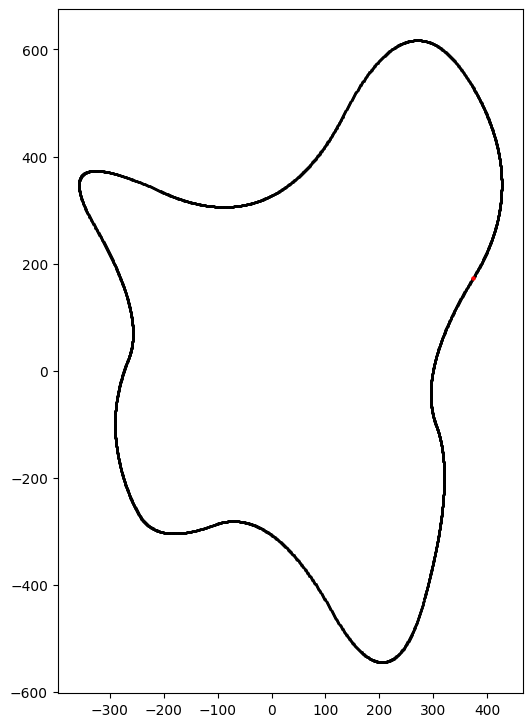

In [2]:
mx, Mx = min(bezier_track_dict['x']), max(bezier_track_dict['x'])
my, My = min(bezier_track_dict['y']), max(bezier_track_dict['y'])
dx, dy = Mx-mx, My-my
row, col = 6, 6 * (dy/dx)
fig, ax = plt.subplots(figsize=(row, col))
for i, (x, y) in enumerate(zip(bezier_track_dict['x'], bezier_track_dict['y'])):
    plt.scatter(x, y, s=1, c='k')
plt.scatter(bezier_track_dict['x'][0], bezier_track_dict['y'][0], s=5, c='r')

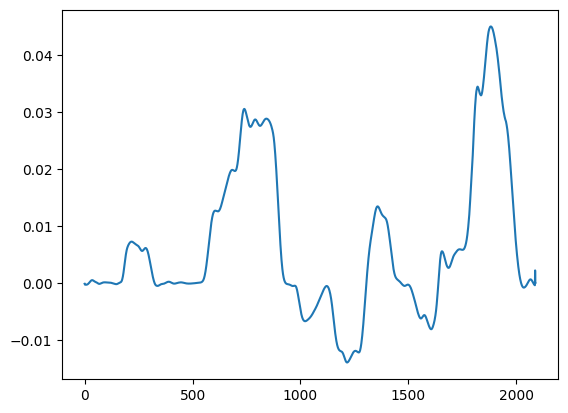

In [3]:
plt.plot(nam_track_dict['kappa'])

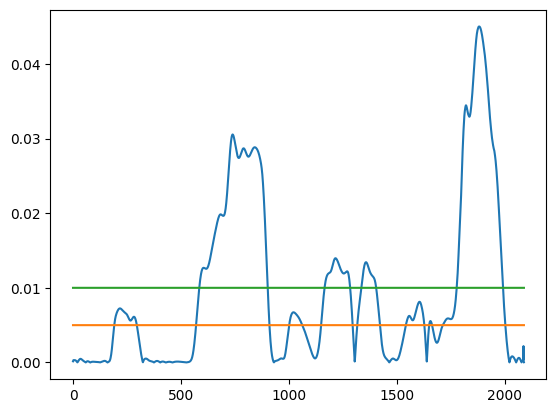

In [8]:
plt.plot(abs(nam_track_dict['kappa']))
plt.plot([0.005 for _ in range(len(nam_track_dict['kappa']))])
plt.plot([0.01 for _ in range(len(nam_track_dict['kappa']))])


In [19]:
conf_path = r'D:\meow_racer_experiments\nam_c_logs\0606_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_HCV_KThresh01'.replace('\\', '/')
conf_dict = pickle.load(open(f"{conf_path}/conf_dict.pkl", "rb"))

In [20]:
conf_dict['reward']

{'vel_joint_reward': {'usage': True,
  'corner_reward_weight': 3.0,
  'straight_reward_weight': 1.0,
  'corner_kappa_thresh': 0.01,
  'normalize_vel': True,
  'normalize_kappa': False,
  'track_align_vel': True},
 'hard_corner_curvature_weighted_vel_reward': {'usage': False,
  'reward_weight': 1.0,
  'normalize_kappa': False,
  'corner_kappa_thresh': 0.01,
  'normalize_vel': False},
 'curvature_weighted_vel_reward': {'usage': True,
  'kappa_weight_value': 5,
  'reward_weight': 3.0,
  'normalize_vel': True},
 'progress_reward': {'usage': True, 'reward_value': 1000},
 'curvature_vel_reward': {'usage': True,
  'reward_value': 1.0,
  'target_theta': 20,
  'future_mode': 'mean',
  'continuous': True,
  'fix_possible_error': False,
  'vehicle_speed_vx': True},
 'E_phi_reward': {'usage': True, 'reward_value': 0.1},
 'movement_reward': {'usage': False,
  'reward_value': 1.0,
  'reward_min_vel': 8.0,
  'reward_max_vel': 25.0,
  'overspeed_pen_value': 1.0,
  'underspeed_pen_value': 1.0},
 'tile_

In [13]:
max(abs(nam_track_dict['kappa']))

np.float64(0.04500834821444676)

In [ ]:
for v in range(30):
    normed_vel = v / 55.5
    a = 

In [27]:
vel = 20
normed_vel = vel / 55.5
ref_kappa = 0.01 #0.04
corner_weight=3 #2 #3
straight_weight=1
ratio = ref_kappa / max(abs(nam_track_dict['kappa']))
# a = np.exp(-abs(ratio-1)) * normed_vel * corner_weight
a = ratio * normed_vel * corner_weight
# a = ref_kappa / max(abs(nam_track_dict['kappa'])) * normed_vel * corner_weight #4 #3
b = normed_vel * straight_weight #0.5
print(a, b)

0.240195680128087 0.36036036036036034


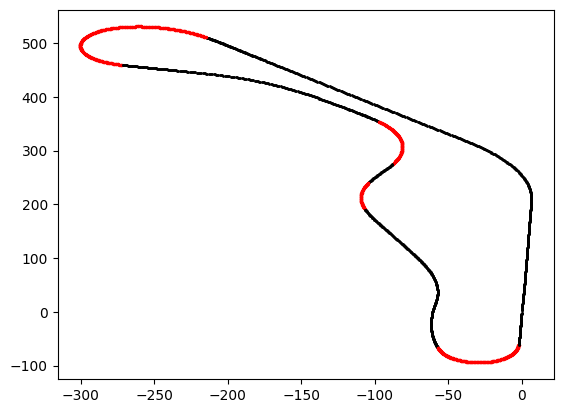

In [24]:
corner_idxs = np.where(abs(nam_track_dict['kappa']) > 0.01)
for i, (x, y) in enumerate(zip(nam_track_dict['x'], nam_track_dict['y'])):
    if i in corner_idxs[0]:
        plt.scatter(x, y, s=2, c='r')
    else:
        plt.scatter(x, y, s=1, c='k')

In [ ]:
from observation.lidar_sensor import Observation_Lidar_State
import numpy as np
lidar_m, lidar_M, num_lidar = -90, 90, 60
lidar_angles = np.linspace(lidar_m, lidar_M, num_lidar)
max_range = 100
print(lidar_angles)


[-90.         -86.94915254 -83.89830508 -80.84745763 -77.79661017
 -74.74576271 -71.69491525 -68.6440678  -65.59322034 -62.54237288
 -59.49152542 -56.44067797 -53.38983051 -50.33898305 -47.28813559
 -44.23728814 -41.18644068 -38.13559322 -35.08474576 -32.03389831
 -28.98305085 -25.93220339 -22.88135593 -19.83050847 -16.77966102
 -13.72881356 -10.6779661   -7.62711864  -4.57627119  -1.52542373
   1.52542373   4.57627119   7.62711864  10.6779661   13.72881356
  16.77966102  19.83050847  22.88135593  25.93220339  28.98305085
  32.03389831  35.08474576  38.13559322  41.18644068  44.23728814
  47.28813559  50.33898305  53.38983051  56.44067797  59.49152542
  62.54237288  65.59322034  68.6440678   71.69491525  74.74576271
  77.79661017  80.84745763  83.89830508  86.94915254  90.        ]


In [19]:
import numpy as np
print(np.diff(nam_track_dict['theta']))

[1.10967215 1.10843563 1.10626349 ... 0.8299292  0.83472977 2.73076855]


In [ ]:

len(track_dict['x']), len(nam_track_dict['x'])

(2284, 2090)

In [ ]:
def rotate_points(points, center, rotation_matrix):
    # 무게 중심을 원점으로 이동
    translated_points = points - center
    # 회전 적용
    rotated_points = np.dot(translated_points, rotation_matrix.T)
    # 다시 원래 위치로 이동
    rotated_points += center
    return rotated_points

(np.float64(-2.327627944162882),
 np.float64(2.327627944162882),
 np.float64(-2.9315698604072065),
 np.float64(2.9315698604072065))

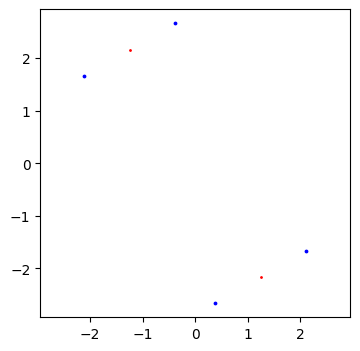

In [116]:
import math
import matplotlib.pyplot as plt
import numpy as np 

x, y = -100, 300
w, h = 2, 5
phi = math.radians(120)
fig, ax = plt.subplots(figsize=(4, 4))
center_coords = np.array([
    # [h/2, 0],  [0, -w/2], [-h/2, 0], [0, w/2],
    [h/2, 0], [-h/2, 0]
])

R = np.array([
    [math.cos(phi), -math.sin(phi)],[math.sin(phi), math.cos(phi)]
])
rotated_center = np.dot(center_coords, R.T)

for i in range(len(rotated_center)):
    plt.scatter(rotated_center[i][0], rotated_center[i][1], s=1, c='r')
    
sides = np.array([[w/2, 0], [-w/2, 0]])
R_perp = np.array([
    [math.cos(phi-math.radians(90)), -math.sin(phi-math.radians(90))],[math.sin(phi-math.radians(90)), math.cos(phi-math.radians(90))]
])
rotated_sides = np.dot(sides, R_perp.T)

new_coords = np.array([rotated_center[0] + rotated_sides[0], rotated_center[0] + rotated_sides[1], rotated_center[1] + rotated_sides[0], rotated_center[1] + rotated_sides[1]])

for i in range(len(new_coords)):
    plt.scatter(new_coords[i][0], new_coords[i][1], s=3, c='b')
plt.axis('equal')

In [108]:
center_coords, rotated_sides

(array([[ 2.5,  0. ],
        [-2.5,  0. ]]),
 array([[ 0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import Polygon, pi, Point, RegularPolygon, Point2D

x, y = -100, 300
w, h = 2, 5
phi = math.radians(120)

coords = np.array([
    # [h/2, w/2],  [h/2, -w/2], [-h/2, -w/2], [-h/2, w/2],
    [-h/2, -w/2], [h/2, -w/2], [h/2, w/2], [-h/2, w/2]
])

car_coords = coords + np.array([x, y])

rotated_points = [Point2D(x, y).rotate(phi) for x, y in coords]

poly = Polygon(*[Point2D(x, y) for x, y in car_coords])


In [97]:
poly.area

10

(np.float64(-102.75),
 np.float64(-97.25),
 np.float64(297.0684301395928),
 np.float64(302.9315698604072))

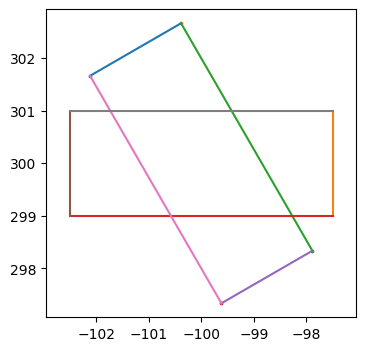

In [118]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import Polygon, pi

x, y = -100, 300
w, h = 2, 5
phi = math.radians(120)
fig, ax = plt.subplots(figsize=(4,4))
coords = np.array([
    [h/2, w/2],  [h/2, -w/2], [-h/2, -w/2], [-h/2, w/2],
])
R = np.array([
    [math.cos(phi), -math.sin(phi)],[math.sin(phi), math.cos(phi)]
])
car_coords = coords + np.array([x, y])
trans = np.dot(coords, R.T)
trans += np.array([[x,y], [x,y], [x,y], [x,y]])
# trans = np.dot(car_coords, R.T)

for i, (xx, yy) in enumerate(trans):
    plt.scatter(xx, yy, s=3)
for i in range(4):
    j = (i+1)%4
    plt.plot([trans[i][0], trans[j][0]], [trans[i][1], trans[j][1]])
    plt.plot([car_coords[i][0], car_coords[j][0]], [car_coords[i][1], car_coords[j][1]])
    
plt.axis('equal')

In [29]:
math.degrees(3.3)

189.07607239317164

In [37]:
car_dict['bicycle_model'].ref_arr_dict['center'][-1], car_dict['bicycle_model'].ref_arr_dict['phi'][-1]

([np.float64(131.35443006261843), np.float64(520.4203164580779)],
 array(2.94022785))

In [53]:
np.pi, math.pi

(3.141592653589793, 3.141592653589793)

In [ ]:
math.degrees(3.323+2.776)  % 180

349.4469592502891

In [63]:
(3.323+2.776) % np.pi

2.957407346410207

In [50]:
math.degrees(2.776)

159.0530839283165

In [49]:
math.degrees(3.323)

190.39387532197256

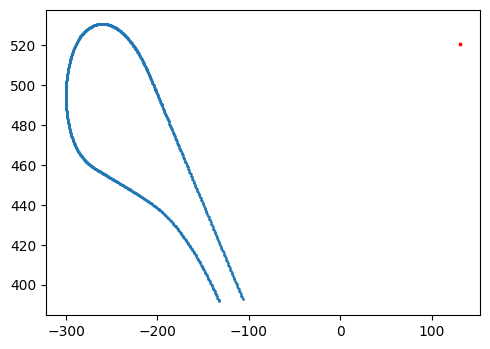

In [ ]:
s = 400
e = 1100
mx, Mx = min(nam_track_dict['x'][s:e]), max(nam_track_dict['x'][s:e])
my, My = min(nam_track_dict['y'][s:e]), max(nam_track_dict['y'][s:e])
row = 5
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))

plt.scatter(nam_track_dict['x'][s:e], nam_track_dict['y'][s:e], s=1)
plt.scatter(nam_track_dict)
# plt.scatter(car_dict['bicycle_model'].ref_arr_dict['center'][-1][0],car_dict['bicycle_model'].ref_arr_dict['center'][-1][1], s=3, c='r' )
plt.tight_layout()

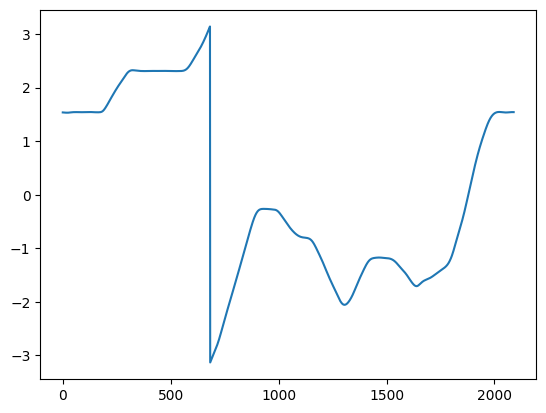

In [65]:
phi_arr = nam_track_dict['phi']
# wrapped = np.arctan2(np.sin(phi_arr), np.cos(phi_arr))
wrapped = (phi_arr + np.pi) % (2 * np.pi) - np.pi
plt.plot(wrapped)

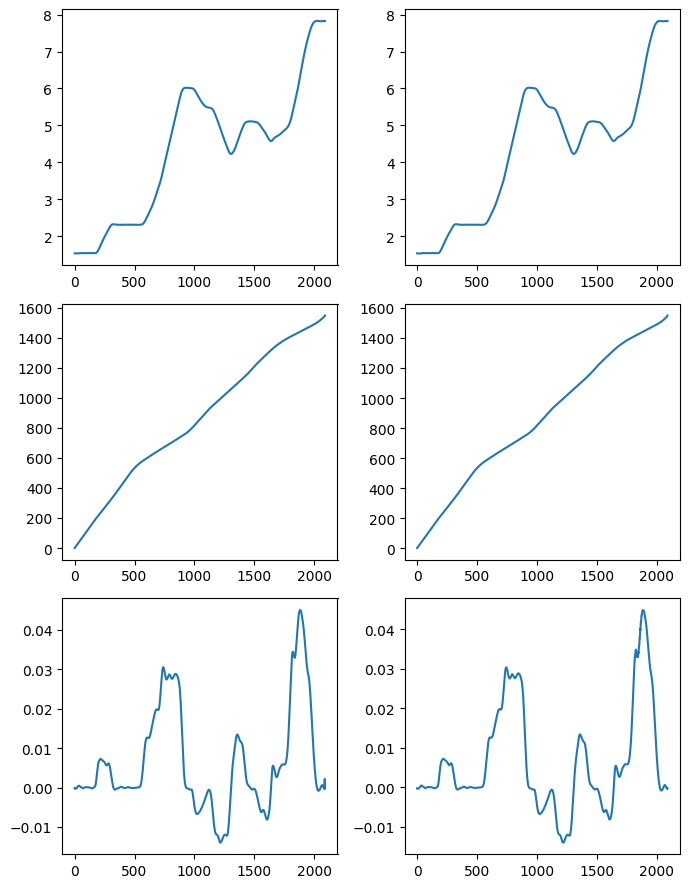

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(7, 9))
ax[0, 0].plot(nam_track_dict['phi']);ax[0, 1].plot(nam_track_cfg['phi'])
ax[1, 0].plot(nam_track_dict['theta']);ax[1, 1].plot(nam_track_cfg['theta'])
ax[2, 0].plot(nam_track_dict['kappa']);ax[2, 1].plot(nam_track_cfg['kappa'])
plt.tight_layout()


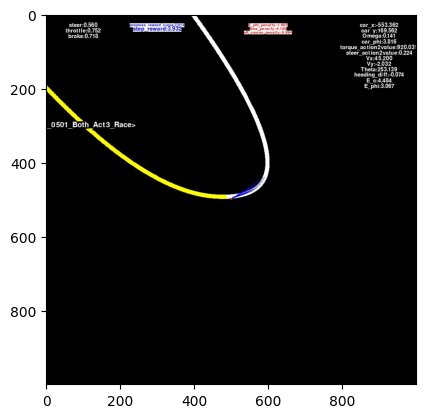

In [21]:
plt.imshow(screen)

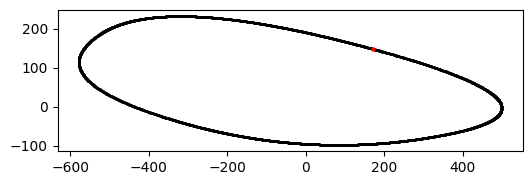

In [22]:
mx, Mx = min(track_dict['x']), max(track_dict['x'])
my, My = min(track_dict['y']), max(track_dict['y'])
dx, dy = Mx-mx, My-my
row, col = 6, 6 * (dy/dx)
fig, ax = plt.subplots(figsize=(row, col))
for i, (x, y) in enumerate(zip(track_dict['x'], track_dict['y'])):
    plt.scatter(x, y, s=1, c='k')
plt.scatter(track_dict['x'][0], track_dict['y'][0], s=5, c='r')

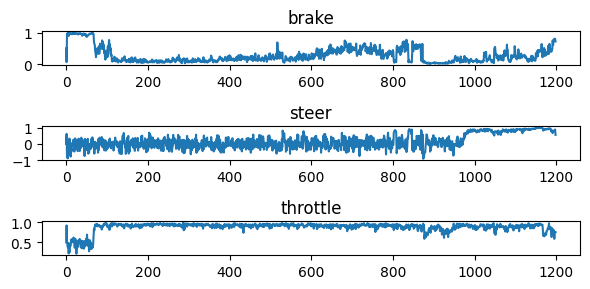

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(6,3))
ax[0].plot(car_dict['actions']['brake']);ax[0].set_title("brake")
ax[1].plot(car_dict['actions']['steer']);ax[1].set_title("steer")
ax[2].plot(car_dict['actions']['throttle']);ax[2].set_title("throttle")

plt.tight_layout()

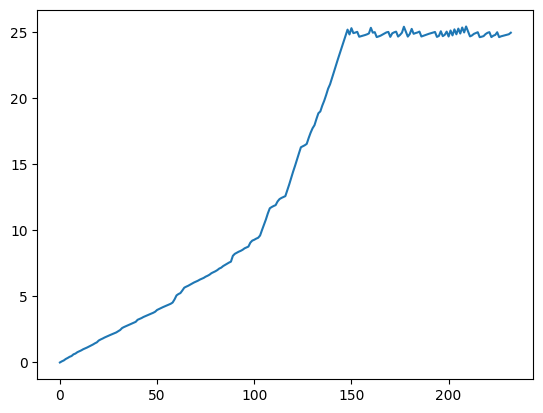

In [39]:
plt.plot(np.array(bicycle_model_dict['car_traj_arr']).T[-2])

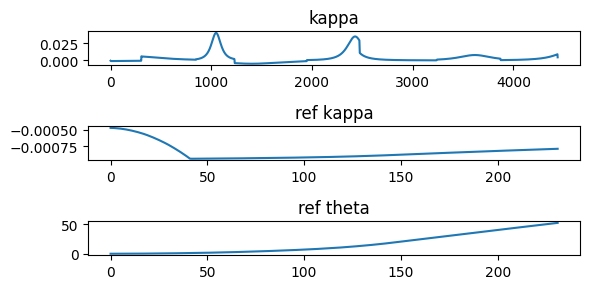

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(6, 3))
ax[0].plot(track_dict['kappa']);ax[0].set_title("kappa")
ax[1].plot(bicycle_model_dict['ref_arr_dict']['kappa']);ax[1].set_title("ref kappa")
ax[2].plot(bicycle_model_dict['ref_arr_dict']['theta']);ax[2].set_title("ref theta")
fig.tight_layout()

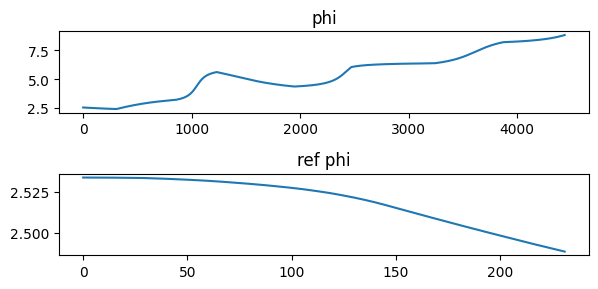

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(6, 3))
ax[0].plot(track_dict['phi']);ax[0].set_title("phi")
ax[1].plot(bicycle_model_dict['ref_arr_dict']['phi']);ax[1].set_title("ref phi")
fig.tight_layout()

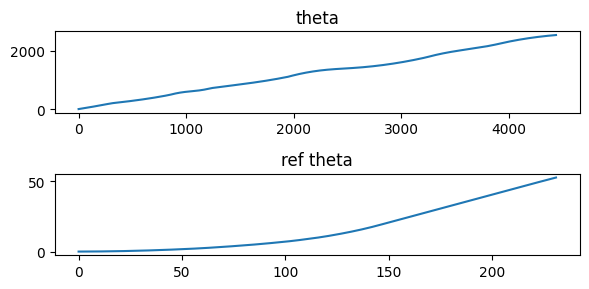

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(6, 3))
ax[0].plot(track_dict['theta']);ax[0].set_title("theta")
ax[1].plot(bicycle_model_dict['ref_arr_dict']['theta']);ax[1].set_title("ref theta")
fig.tight_layout()

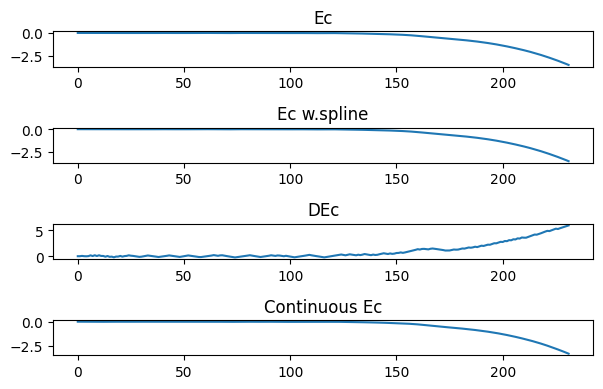

In [43]:
fig, ax = plt.subplots(4, 1, figsize=(6,4))
ax[0].plot(bicycle_model_dict['e_c_arr']);ax[0].set_title("Ec")
ax[1].plot(bicycle_model_dict['Ec_w_spline_arr']);ax[1].set_title("Ec w.spline")
ax[2].plot(bicycle_model_dict['deriv_dict']['dE_c']);ax[2].set_title("DEc")
ax[3].plot(bicycle_model_dict['continuous_e_c_arr']);ax[3].set_title("Continuous Ec")

fig.tight_layout()

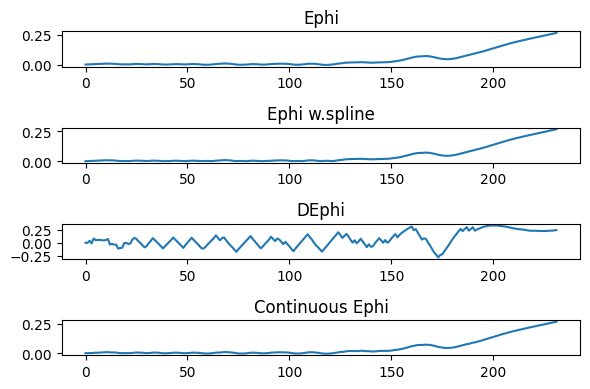

In [44]:
fig, ax = plt.subplots(4, 1, figsize=(6,4))
ax[0].plot(bicycle_model_dict['e_phi_arr']);ax[0].set_title("Ephi")
ax[1].plot(bicycle_model_dict['Ephi_w_spline_arr']);ax[1].set_title("Ephi w.spline")
ax[2].plot(bicycle_model_dict['deriv_dict']['dE_phi']);ax[2].set_title("DEphi")
ax[3].plot(bicycle_model_dict['continuous_e_phi_arr']);ax[3].set_title("Continuous Ephi")
fig.tight_layout()

In [45]:
from openpyxl import Workbook, load_workbook
import os, sys
fpath = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\Tuning\SAC_Tuning_Baseline.xlsx'

wb = load_workbook(filename=fpath, read_only=False) ##보안때문에 엑셀 파일을 파이썬으로 접근할 수 없는 상황임.



BadZipFile: File is not a zip file

In [ ]:
import pandas as pd
map_path = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\statics\CE_brake_map.xlsx'.replace('\\', '/')
df = pd.read_excel(map_path, engine='openpyxl')


BadZipFile: File is not a zip file

In [ ]:
from scipy.interpolate import interp1d
import numpy as np

ref_pressure = np.array([
    0, 2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70
], dtype=np.float32)

ref_pressure /= max(ref_pressure) #normalized to ratio (0~1)


bps_map = {
    3 : np.array([0, 0, 1.5, 2.2, 3.5, 7, 10, 12, 18, 27, 38, 50, 65, 80, 90, 90, 90], dtype=np.float32),
    10: np.array([0, 0, 1.5, 2.2, 3.5, 7, 10, 12, 18, 27, 38, 50, 65, 90, 130, 160, 180], dtype=np.float32),
    20: np.array([0, 0, 1.1, 2.2, 3.5, 7, 12, 18, 25, 33, 42, 55, 74, 101, 130, 160, 180], dtype=np.float32),
    30: np.array([0, 0, 1.1, 2.2, 3.5, 7, 12, 18, 25, 33, 42, 55, 74, 101, 130, 160, 180], dtype=np.float32),
    50: np.array([0, 0, 1.1, 2.2, 3.5, 7.5, 12.5, 18.5, 26, 33.5, 43.5, 57.5, 76.5, 101, 130, 160, 180], dtype=np.float32),
    90: np.array([0, 0, 1.1, 2.2, 3.5, 7.5, 12.5, 18.5, 26, 33.5, 43.5, 57.5, 76.5, 101, 130, 160, 180], dtype=np.float32),
}

In [290]:
len([0, 0, 1.5, 2.2, 3.5, 7, 10, 12, 18, 27, 38, 50, 65, 80, 90, 90, 90],)

17

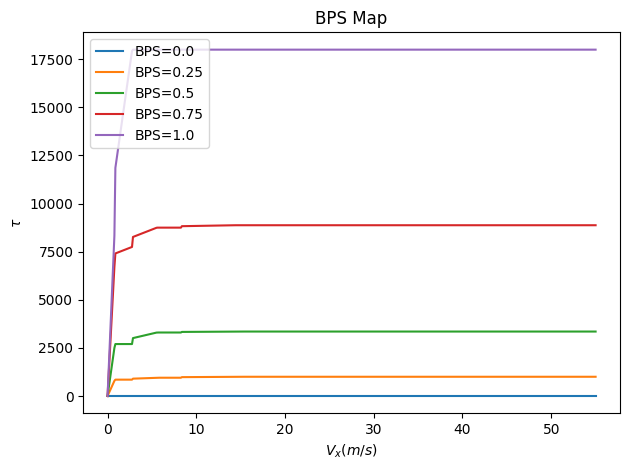

In [30]:
from vehicle.vehicle_aps_bps_mapping import BPS_Mapping
fig, ax = plt.subplots(1, 1)
bps_mapper = BPS_Mapping()
min_tau = -18000.

velocity_arr = np.linspace(0, 55, 500)
bps_arr = np.linspace(0, 1, 5)

for bps in bps_arr:
    torque_arr = []
    for vel in velocity_arr:
        torque = bps_mapper._get_BPS_Torque_Continuous(
            brake_action=bps, min_tau=min_tau, car_vx=vel
        )
        torque_arr.append(torque)

    plt.plot(velocity_arr, torque_arr, label=f"BPS={bps}")
plt.xlabel(r"$V_{x} (m/s) $")
plt.ylabel(r"$ \tau $")
plt.title("BPS Map")
plt.legend()
fig.tight_layout()

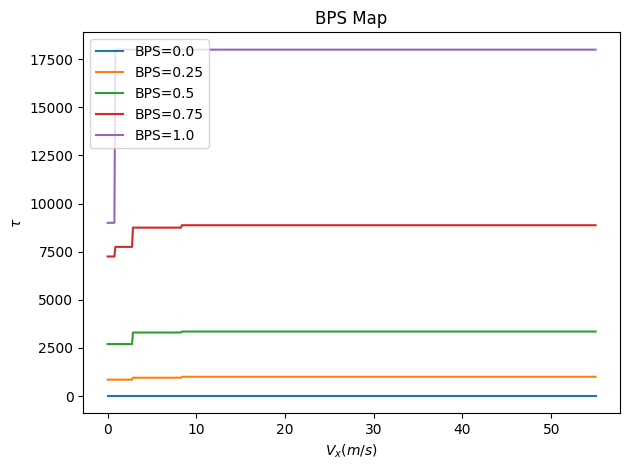

In [29]:
from vehicle.vehicle_aps_bps_mapping import BPS_Mapping
fig, ax = plt.subplots(1, 1)
bps_mapper = BPS_Mapping()
min_tau = -18000.

velocity_arr = np.linspace(0, 55, 500)
bps_arr = np.linspace(0, 1, 5)

for bps in bps_arr:
    torque_arr = []
    for vel in velocity_arr:
        torque = bps_mapper._get_BPS_Torque(
            brake_action=bps, min_tau=min_tau, car_vx=vel
        )
        torque_arr.append(torque)

    plt.plot(velocity_arr, torque_arr, label=f"BPS={bps}")
plt.xlabel(r"$V_{x} (m/s) $")
plt.ylabel(r"$ \tau $")
plt.title("BPS Map")
plt.legend()
fig.tight_layout()

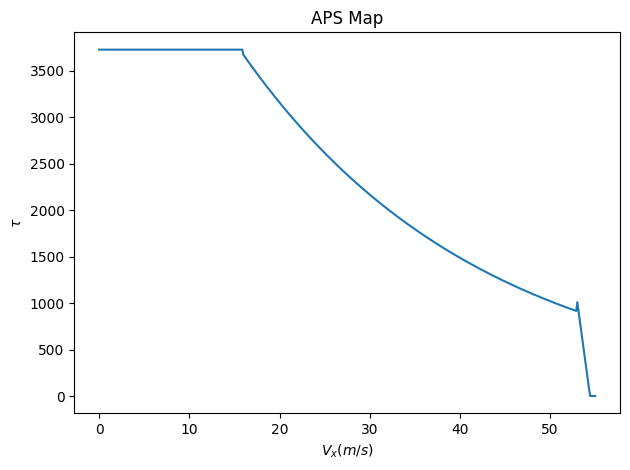

In [28]:
from vehicle.vehicle_aps_bps_mapping import APS_Mapping
fig, ax = plt.subplots(1,1)
aps_mapper = APS_Mapping()
velocity_arr = np.linspace(0, 55, 500)
# velocity_arr = np.linspace(0, 200, 1000)

torque_arr = [] #여기서 최댓값이 max_Tau
for vel in velocity_arr:
    torque = aps_mapper._get_APS_Torque(throttle_action=1, max_tau=3727.5, car_vx=vel)
    torque_arr.append(torque)

plt.plot(velocity_arr, torque_arr)
plt.xlabel(r"$V_{x} (m/s) $")
plt.ylabel(r"$ \tau $")
plt.title("APS Map")
fig.tight_layout()

In [17]:
kph_3_interp = interp1d(
    x=ref_pressure, y=bps_map[3], kind='linear'
)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
import os, sys
from PIL import Image

sys.path.append(r"C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\environment".replace("\\", "/"))
sys.path.append(r"C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv".replace("\\", "/"))


from track.generate_random import Nam_TrackGenerator
from vehicle.vehicle import RaceCar
from vehicle.vehicle_dynamics import RaceCar_Dynamics

nam_track_cfg_path = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\statics\nam_c_track.pkl'.replace('\\', '/')
nam_track_gen = Nam_TrackGenerator(
    track_width=7, 
    nam_track_path=nam_track_cfg_path, min_num_ckpt=4, max_num_ckpt=12
)

nam_track_gen._generate()
nam_track_dict = nam_track_gen._calculate_track_dict()

In [2]:
# car = RaceCar(action_dim=3, dt=0.2,
#               aps_bps_weight=1, allow_both_feet=True,
#               brake_on_pos_vel=True, normalize_aps_bps=False, 
#               )

In [32]:
config_yaml_path = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\environment\vehicle\jw_config.yaml'.replace('\\', '/')
DT=0.1
# bm = RaceCar_Dynamics(dt=0.01) # dt=0.2
bm = RaceCar_Dynamics(dt=DT)



In [33]:
from collections import defaultdict

log_file_path = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\environment\debug\2024-11-11_04-42-37.txt'.replace('\\', '/')


control_dict = defaultdict(list)

org_log_dict = defaultdict(list)

with open(log_file_path, 'r') as f:
    for i, line in enumerate(f):
        arr = np.array([line.strip().split('\t')], dtype=float).reshape(-1)
        if i == 0:
            init_x = arr[1]
            init_y = arr[2]
            init_phi = arr[3]
            init_vx = arr[4]  
            init_vy = arr[5]
        control_dict['Time'].append(arr[0])
        control_dict['Steer'].append(arr[8])
        control_dict['Torque'].append(arr[7])

        org_log_dict['x'].append(arr[1])
        org_log_dict['y'].append(arr[2])
f.close()

In [34]:
from scipy.interpolate import CubicSpline, interp1d

track_theta = np.array(nam_track_dict['theta'])
track_centerX, track_centerY = np.array(nam_track_dict['x']), np.array(nam_track_dict['y'])
track_leftX, track_leftY = np.array(nam_track_dict['left']).T[0], np.array(nam_track_dict['left']).T[1]
track_rightX, track_rightY = np.array(nam_track_dict['right']).T[0], np.array(nam_track_dict['right']).T[1]
track_phi = np.array(nam_track_dict['phi'])
track_kappa = np.array(nam_track_dict['kappa'])

track_centerX[-1] = track_centerX[0];track_centerY[-1] = track_centerY[0]

track_leftX[-1] = track_leftX[0];track_leftY[-1] = track_leftY[0]

track_rightX[-1] = track_rightX[0];track_rightY[-1] = track_rightY[0]
        
theta_center_spline = CubicSpline(track_theta, np.vstack([track_centerX, track_centerY]).T, bc_type='periodic')
theta_left_spline = CubicSpline(track_theta, np.vstack([track_leftX, track_leftY]).T, bc_type='periodic')
theta_right_spline = CubicSpline(track_theta, np.vstack([track_rightX, track_rightY]).T, bc_type='periodic')
phi_spline = interp1d(track_theta, track_phi, kind='linear', fill_value='extrapolate')
kappa_spline = interp1d(track_theta, track_kappa, kind='linear', fill_value='extrapolate')
        
        

In [36]:
bm._reset(
    config_yaml_path=config_yaml_path,
    init_x=init_x,
    init_y=init_y,
    init_phi=  init_phi,
    # init_phi = math.radians(45),
    init_kappa=nam_track_dict['kappa'][0],
)
bm.Vx = 0 # 10 #45 #20 #init_vx
bm.Vy = init_vy

In [37]:
x_arr = np.array([bm.car_x, bm.car_y, bm.car_phi, bm.Vx, bm.Vy, bm.Omega])

for i in range(1500):
# for i in range(len(control_dict['Time'])):
    # bm.curvilinear_dynamics(
    #                         torque_action2value=control_dict['Torque'][i],
    #                         # torque_action2value=0,
    #                         # steer_action2value=0,
    #                         steer_action2value=control_dict['Steer'][i],
    #                         # steer_action2value=0.3 * math.sin(i * 100),
    #                         zero_force_neg_vel=True,
    #                         always_pos_vel=True,
    #                         allow_neg_torque=False)
    # bm.cartesian_dynamics()
    # for _ in range(20):
    # for _ in range(2):
    for _ in range(1):
        x_arr = bm.cartesian_dynamics_2(
        x=x_arr, 
        # u = np.array([control_dict['Torque'][i], control_dict['Steer'][i]]),
        u = np.array([0, 0]),
        # u = np.array([10, 1 * math.sin(i * 100)]),
        # u = np.array([1000, 0]),
        zero_force_neg_vel=True,
        allow_neg_torque =True,
        always_pos_vel=  True
    )
    bm.track_reference_error(
        nam_track_dict,
        theta_center_spline, theta_left_spline, theta_right_spline, phi_spline, kappa_spline
    )
    bm._calculate_Ec_w_spline(
        theta_center_spline, theta_left_spline, theta_right_spline
    )
    bm._calculate_Ephi_w_spline(
        phi_spline
    )
    bm._calculate_discrete_error()

In [38]:
traj_x, traj_y = np.array(bm.car_traj_arr).T[0], np.array(bm.car_traj_arr).T[1]

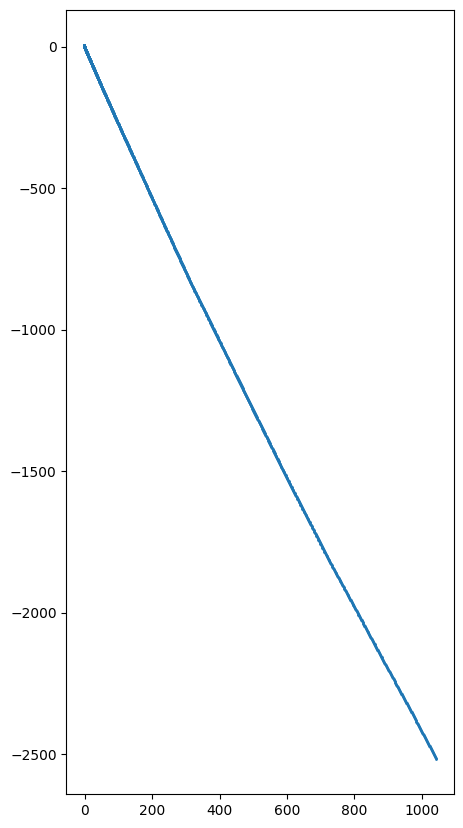

In [39]:
mx, Mx = min(nam_track_dict['x']), max(nam_track_dict['x'])
my, My = min(nam_track_dict['y']), max(nam_track_dict['y'])

dx, dy = Mx-mx, My-my

row = 5
col = row * (dy/dx)

fix, ax = plt.subplots(figsize=(row, col))

# for x, y in zip(nam_track_dict['x'], nam_track_dict['y']):
#     plt.scatter(x, y, s=1, c='k')
plt.scatter(traj_x, traj_y, s=1)
# plt.scatter(org_log_dict['x'], org_log_dict['y'], s=1, c='r')
# ax.set_aspect('equal')

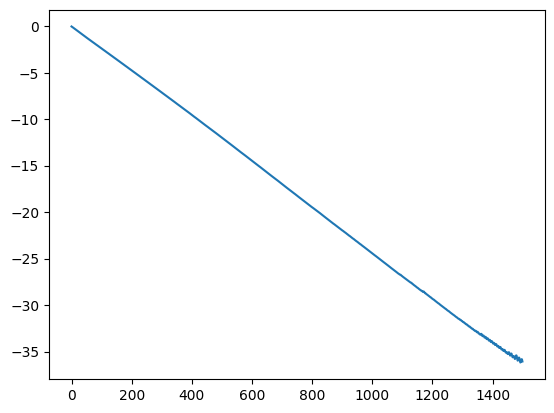

In [40]:
plt.plot(np.array(bm.car_traj_arr).T[3][1:]) #초기 속도로 저장된 0은 제외

In [270]:
import pickle
import matplotlib.pyplot as plt

pkl_fpath = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\environment\pid_run_nam.pkl'.replace('\\', '/')
pkl_data = pickle.load(open(pkl_fpath, 'rb'))

In [271]:
pkl_data.keys()

dict_keys(['TORQUE_PID_CONF', 'STEER_PID_CONF', 'BM', 'TORQUE', 'STEER'])

In [281]:
pkl_data['TORQUE_PID_CONF']

{'vel_target': 12, 'Kp': 1000, 'Ki': 0.0, 'Kd': 0.0001}

In [289]:
pkl_data['STEER_PID_CONF']

{'Kp': 0.2, 'Ki': 0.0, 'Kd': 0.0005}

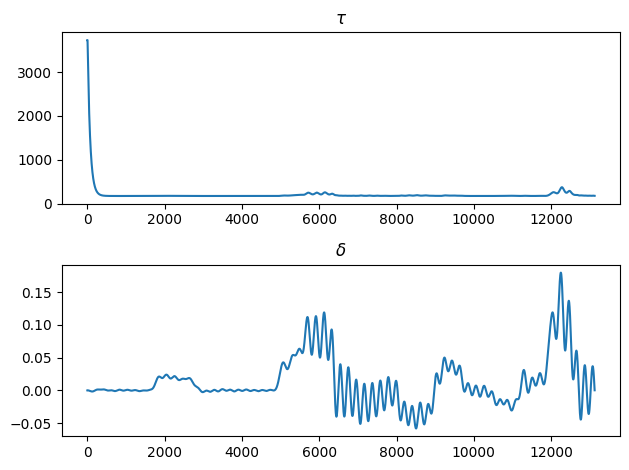

In [279]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(pkl_data['TORQUE']);ax[0].set_title(r"$\tau$")
ax[1].plot(pkl_data['STEER']);ax[1].set_title(r"$\delta$")
fig.set_tight_layout(True)


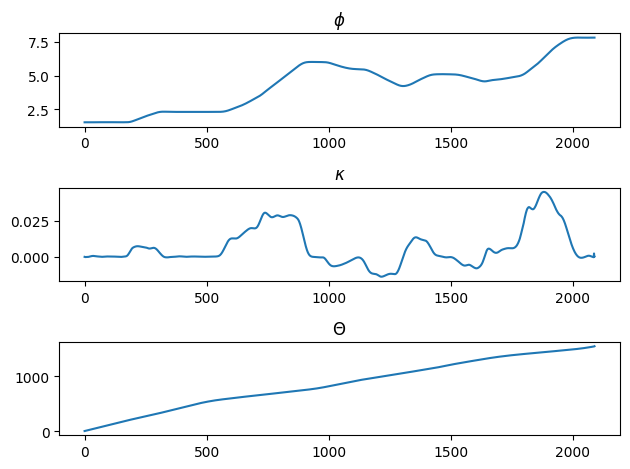

In [288]:

fig, ax = plt.subplots(3, 1)
ax[0].plot(nam_track_dict['phi']);ax[0].set_title(r"$\phi$")
ax[1].plot(nam_track_dict['kappa']);ax[1].set_title(r"$\kappa$")
ax[2].plot(nam_track_dict['theta']);ax[2].set_title(r"$\Theta$")
fig.set_tight_layout(True)

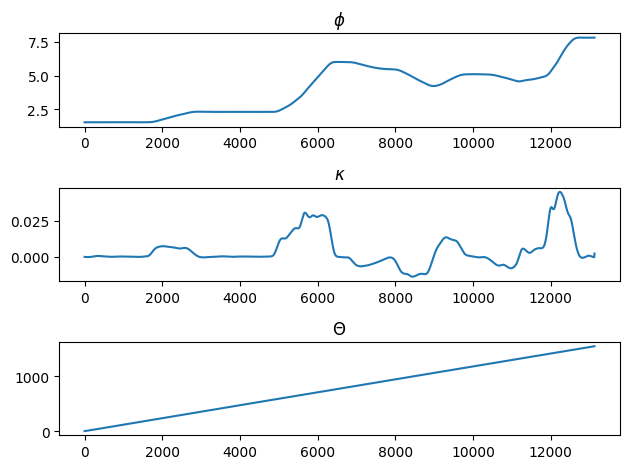

In [287]:
bicycle_model = pkl_data['BM']
ref_arr = bicycle_model['ref_arr_dict']
fig, ax = plt.subplots(3, 1)
ax[0].plot(ref_arr['phi']);ax[0].set_title(r"$\phi$")
ax[1].plot(ref_arr['kappa']);ax[1].set_title(r"$\kappa$")
ax[2].plot(ref_arr['theta']);ax[2].set_title(r"$\Theta$")

fig.set_tight_layout(True)

In [187]:
pkl_data

{'TORQUE_PID_CONF': {'vel_target': 12, 'Kp': 1000, 'Ki': 0.0, 'Kd': 0.0001},
 'STEER_PID_CONF': {'Kp': 0.2, 'Ki': 0.0, 'Kd': 0.0005},
 'BM': {'dt': 0.01,
  'vehicle_constraints': PP_MPCC_Params(track_width=3.5, vx_min=0.0, vx_max=111.11111111111111, vy_min=-13.88888888888889, vy_max=13.88888888888889, ax_min=-10.0, ax_max=10.0, ay_min=-10.0, ay_max=10.0, tau_min=-18000.0, tau_max=3727.5, delta_min=-0.4, delta_max=0.4, dtau_min=-90000.0, dtau_max=18637.5, ddelta_min=-2.0, ddelta_max=2.0, alpha_max=0.2, alpha_min=-0.2),
  'vehicle_model': <vehicle.vehicle_model.vehicleModel at 0x1de7cca9400>,
  'dTheta': 0,
  'dE_c': 0,
  'dE_phi': 0,
  'dVx': np.float64(0.005875908568044133),
  'dVy': np.float64(-0.3811951321521939),
  'dOmega': -0.4370291284693261,
  'dCar_x': 0,
  'dCar_y': 0,
  'dCar_phi': 0,
  'alpha_f': 0,
  'alpha_r': 0,
  'sigma_f': 0,
  'sigma_r': 0,
  'backward_counter': 0,
  'Ffx': 0,
  'Ffy': 0,
  'Frx': 0,
  'Fry': 0,
  'Theta': np.float64(1544.8941317946642),
  'Vx': np.flo

In [182]:
len(nam_track_dict['theta'])

2090

In [181]:
nam_track_dict['theta'][:200]

array([  0.        ,   1.10967215,   2.21810778,   3.32437127,
         4.42901477,   5.53249435,   6.63517788,   7.73735699,
         8.83926244,   9.94107867,  11.04295323,  12.14500216,
        13.24731375,  14.34995253,  15.45296367,  16.55637702,
        17.66021042,  18.76447212,  19.86916293,  20.97427936,
        22.0798146 ,  23.18575725,  24.29209165,  25.3987992 ,
        26.50585946,  27.61325106,  28.72095242,  29.82894233,
        30.93720027,  32.04570656,  33.15444242,  34.26339006,
        35.37253268,  36.4818545 ,  37.59134075,  38.70097766,
        39.81075243,  40.92065317,  42.03066889,  43.14078944,
        44.25100546,  45.36130834,  46.47169015,  47.58214364,
        48.69266214,  49.80323959,  50.91387042,  52.02454956,
        53.13527238,  54.24603467,  55.35683258,  56.46766264,
        57.57852168,  58.68940684,  59.8003155 ,  60.91124533,
        62.0221942 ,  63.13316017,  64.24414152,  65.35513667,
        66.46614422,  67.57716287,  68.68819147,  69.79

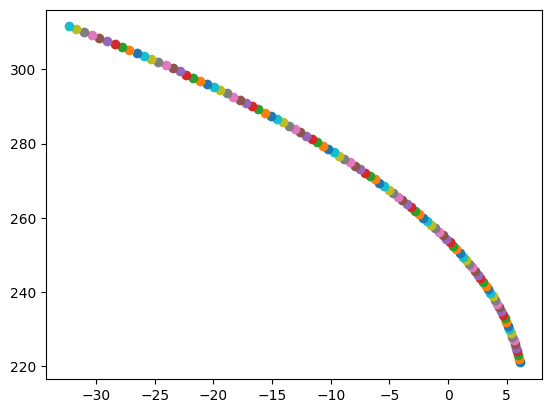

In [185]:
for i in range(200, 300):
    plt.scatter(nam_track_dict['x'][i], nam_track_dict['y'][i])


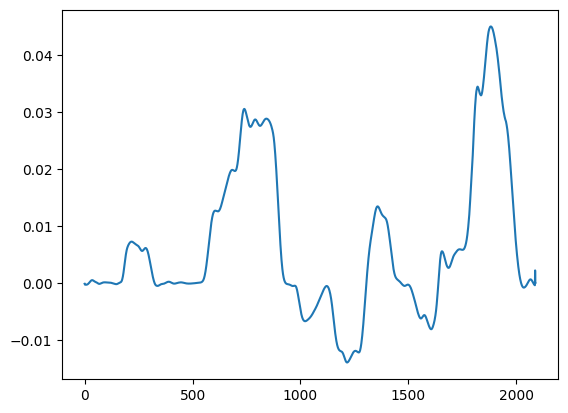

In [188]:
import matplotlib.pyplot as plt

plt.plot(nam_track_dict['kappa'])

In [9]:
src_folder = r'D:\meow_racer_experiments\nam_c_logs\0518_SingleFeet_Nam_Act3_RACE_timePen_minVPen_offCnt\test\fail_epoch_10'.replace('\\', '/')
import pickle
import matplotlib.pyplot as plt
import numpy as np
car_state = pickle.load(open(f"{src_folder}/car_state.pkl", "rb"))




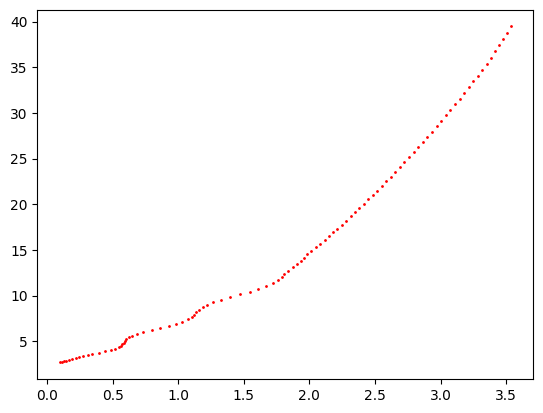

In [11]:
car_x, car_y = np.array(car_state).T[0], np.array(car_state).T[1]
plt.scatter(car_x, car_y, s=1, c='r')

In [12]:
len(car_state)

100

In [ ]:
import pickle
pkl_path = r'D:\meow_racer_experiments\nam_c_logs\0520_SingleFeet_Nam_Act3_Center_targetVel_timePen_minVPen_offCnt/conf_dict.pkl'.replace('\\', '/')
pkl_data = pickle.load(open(pkl_path, 'rb'))
 

{'simulate': {'window_w': 1000.0,
  'window_h': 1000.0,
  'zoom_rate': 1.5,
  'scale_rate': 1.0,
  'bounds': 1000.0,
  'render_fps': 60.0,
  'bg_color': [0, 0, 0],
  'road_color': [255, 255, 255],
  'car_color': [255, 0, 0],
  'lidar_color': [0, 255, 0],
  'fvec_color': [0, 0, 255],
  'action_cx': 100.0,
  'action_cy': 30.0,
  'action_font_size': 15,
  'reward_text_color': [0, 0, 255],
  'reward_bg_color': [255, 255, 255],
  'reward_cx': 300.0,
  'reward_cy': 30.0,
  'reward_font_size': 10,
  'penalty_text_color': [255, 0, 0],
  'penalty_bg_color': [255, 255, 255],
  'penalty_cx': 600.0,
  'penalty_cy': 30.0,
  'penalty_font_size': 10,
  'render_car_state': ['car_x',
   'car_y',
   'Omega',
   'car_phi',
   'torque_action2value',
   'steer_action2value',
   'Vx',
   'Vy',
   'Theta',
   'heading_diff',
   'E_c',
   'E_phi'],
  'car_state_cx': 900.0,
  'car_state_cy': 30.0,
  'car_state_font': 15},
 'environment': {'random_seed': 77,
  'do_debug_logs': 0,
  'track': {'use_nam_only': Tru

In [55]:
nam_track_cfg_path = r'C:\Users\7459985\Desktop\2025\RDDS\001_code\meow_racer\step_1_2_rl_adv\statics\nam_c_track.pkl'.replace('\\', '/')
nam_track_cfg = pickle.load(open(nam_track_cfg_path, 'rb'))


In [15]:
root_path = r'D:\meow_racer_experiments\nam_c_logs\0520_SingleFeet_Nam_Act3_RACE_timePen_minVPen_offCnt\test\success_epoch_295'.replace('\\', '/')
pkl_name = f"{root_path}/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))

In [16]:
car_status = pickle.load(open(f"{root_path}/car_status.pkl", "rb"))
car_action = pickle.load(open(f"{root_path}/ActionDim3_RawAction.pkl", "rb"))

In [17]:
car_action.keys()

dict_keys(['steer', 'brake', 'throttle', 'brake_applied', 'throttle_applied'])

In [18]:
time_spent = np.array(car_state).shape[0] * 0.05
print(f"Time Spent: {time_spent}sec")

Time Spent: 71.10000000000001sec


Text(0.5, 1.0, '$V_{x} (m/s)$')

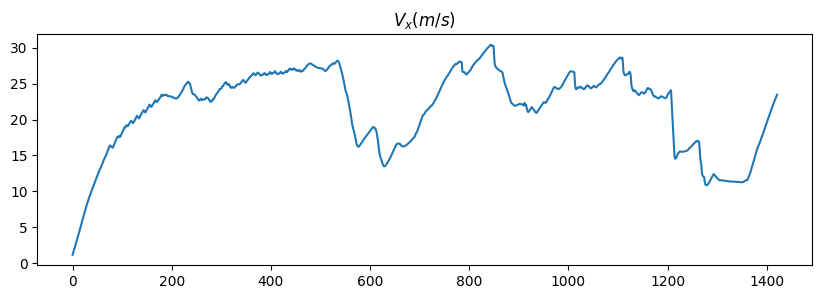

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(car_status).T[0])
plt.title("$V_{x} (m/s)$")

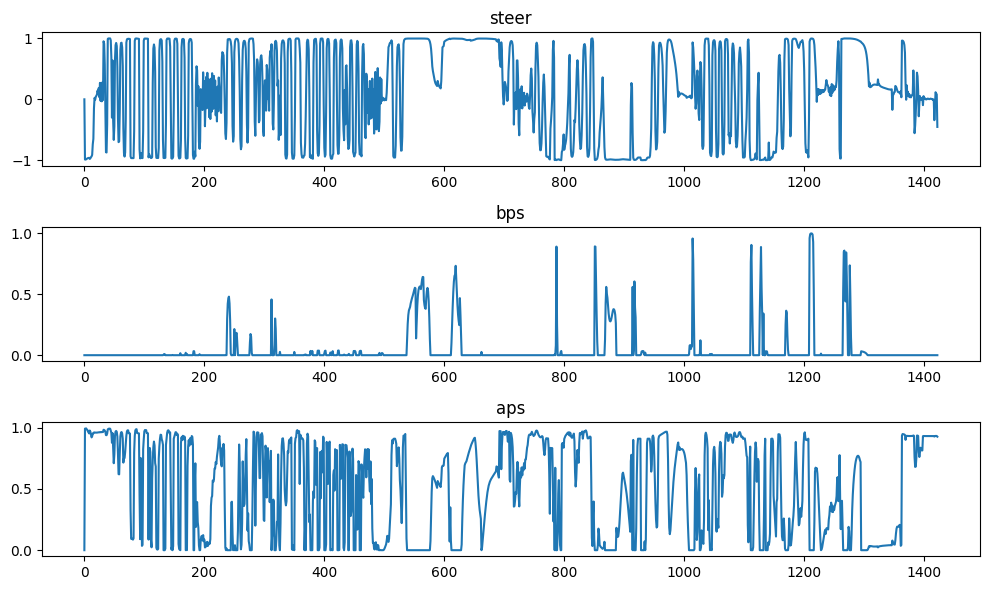

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(car_action['steer']);ax[0].set_title("steer")
ax[1].plot(car_action['brake_applied']);ax[1].set_title("bps")
ax[2].plot(car_action['throttle_applied']);ax[2].set_title("aps")
fig.tight_layout()

Text(0.5, 1.0, 'Race Driving NAM')

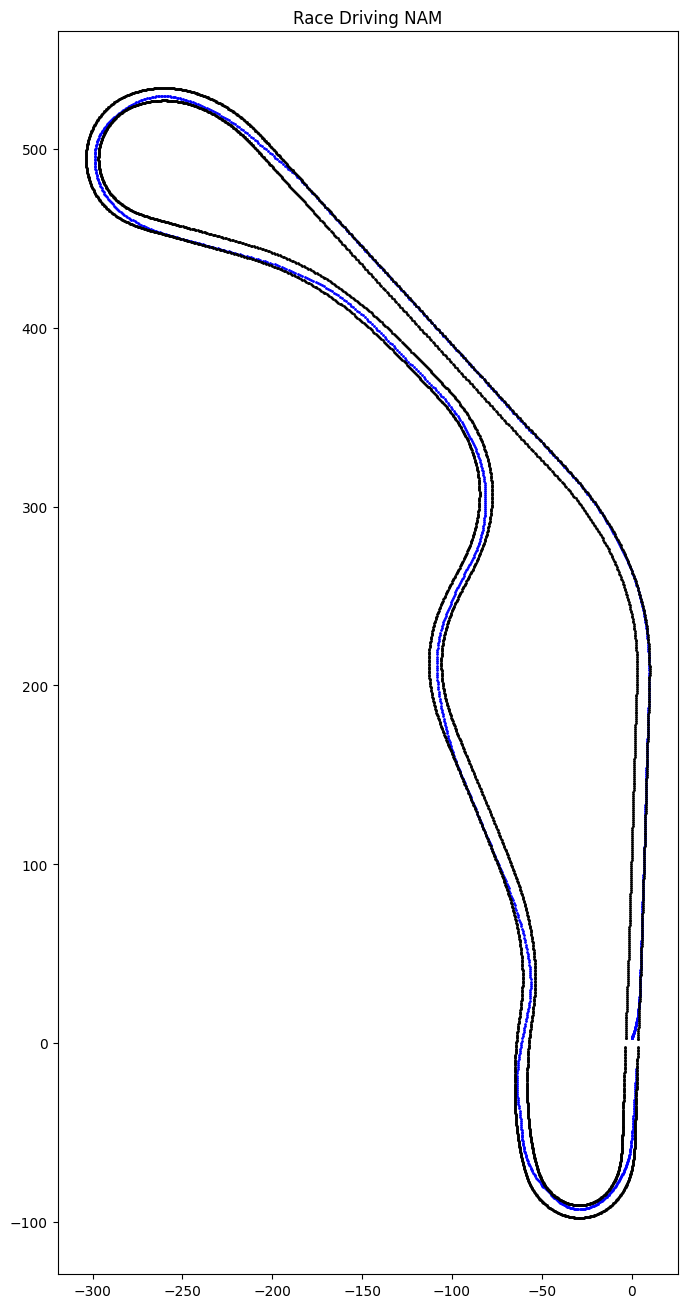

In [21]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')
plt.title("Race Driving NAM")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [25]:
root_path = r'D:\meow_racer_experiments\nam_c_logs\0522_SingleFeet_Nam_Act3_Center_targetVel_timePen_minVPen_offCnt_ProgressRewardCurve_negVelApsReward_Ec10_Trg15\test'.replace('\\', '/')
pkl_name = f"{root_path}/success_epoch_185/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))

lap_time = np.array(car_state).shape[0] * 0.05
print(f"Lap Time:   {lap_time}sec")

Lap Time:   139.85sec


Text(0.5, 1.0, 'Center Line (no Target Vel)')

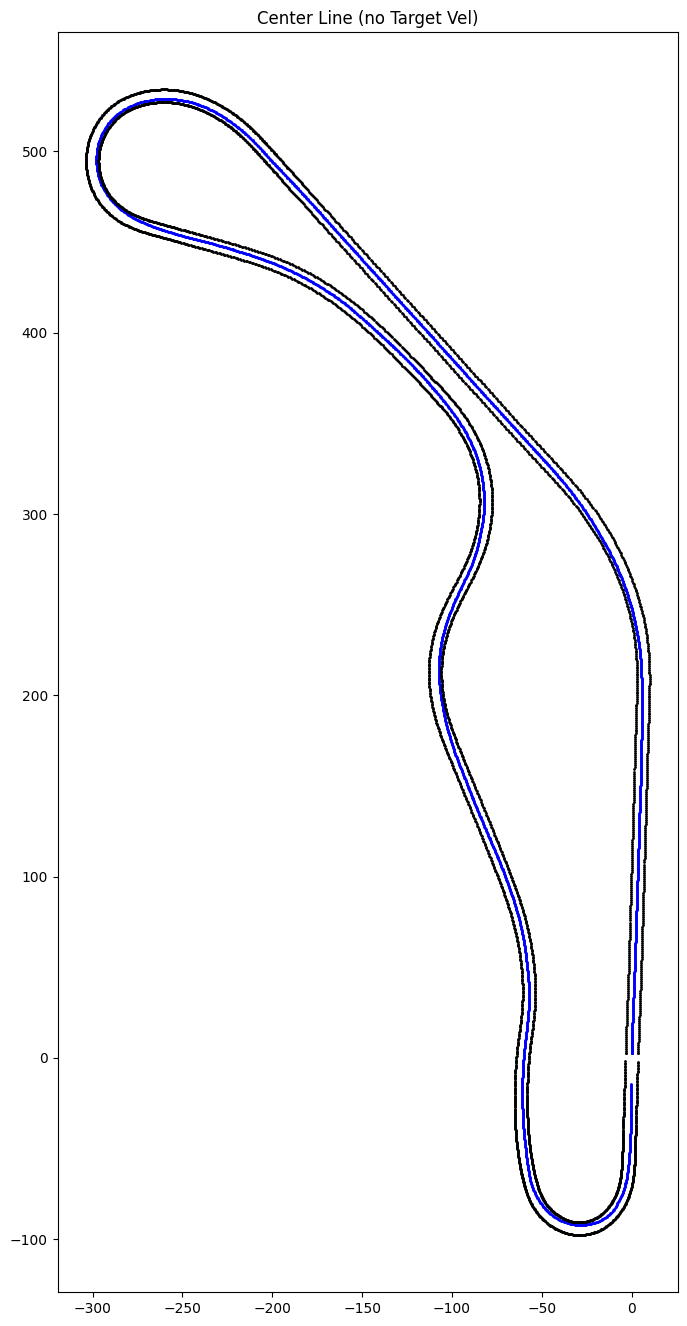

In [26]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

plt.title("Center Line (no Target Vel)")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [28]:
root_path  = r'D:\meow_racer_experiments\nam_c_logs\0526_SingleFeet_Both_Act3_RACE_timePen01_minVPen_offCnt_NegVelAPSReward_TileCntReward5000_PrgRewardVel1_KappaV1_Ephi01\test'.replace('\\', '/')
pkl_name = f"{root_path}/success_epoch_66/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))

In [30]:
print(np.array(car_state).shape[0] * 0.05)

78.60000000000001


Text(0.5, 1.0, 'Center Line (no Target Vel) 78.6sec')

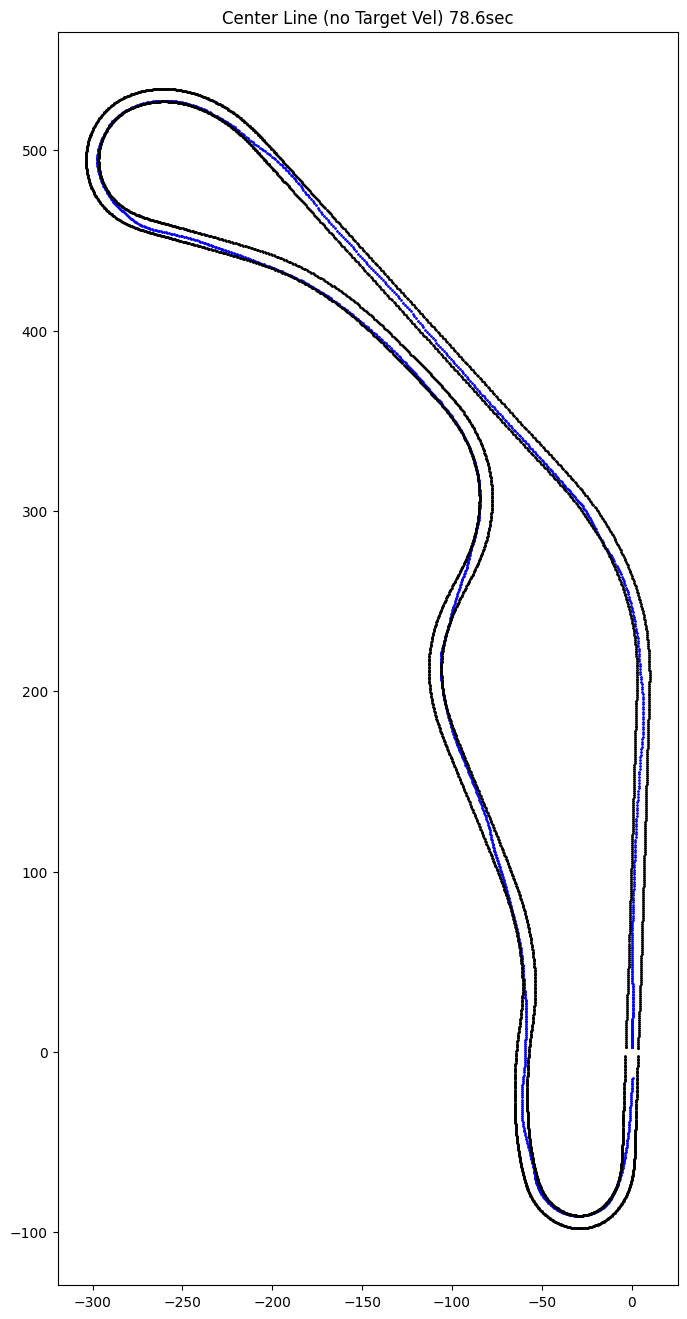

In [33]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

lap_time = np.array(car_state).shape[0] * 0.05
lap_time = round(lap_time, 3)
plt.title(f"Center Line (no Target Vel) {lap_time}sec")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [ ]:
root_path = r'D:\meow_racer_experiments\nam_c_logs\0520_SingleFeet_Nam_Act3_Center_timePen_minVPen_offCnt_ProgressRewardCurve\test\success_epoch_137'.replace('\\', '/')
pkl_name = f"{root_path}/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))

Text(0.5, 1.0, 'Center Line (no Target Vel)')

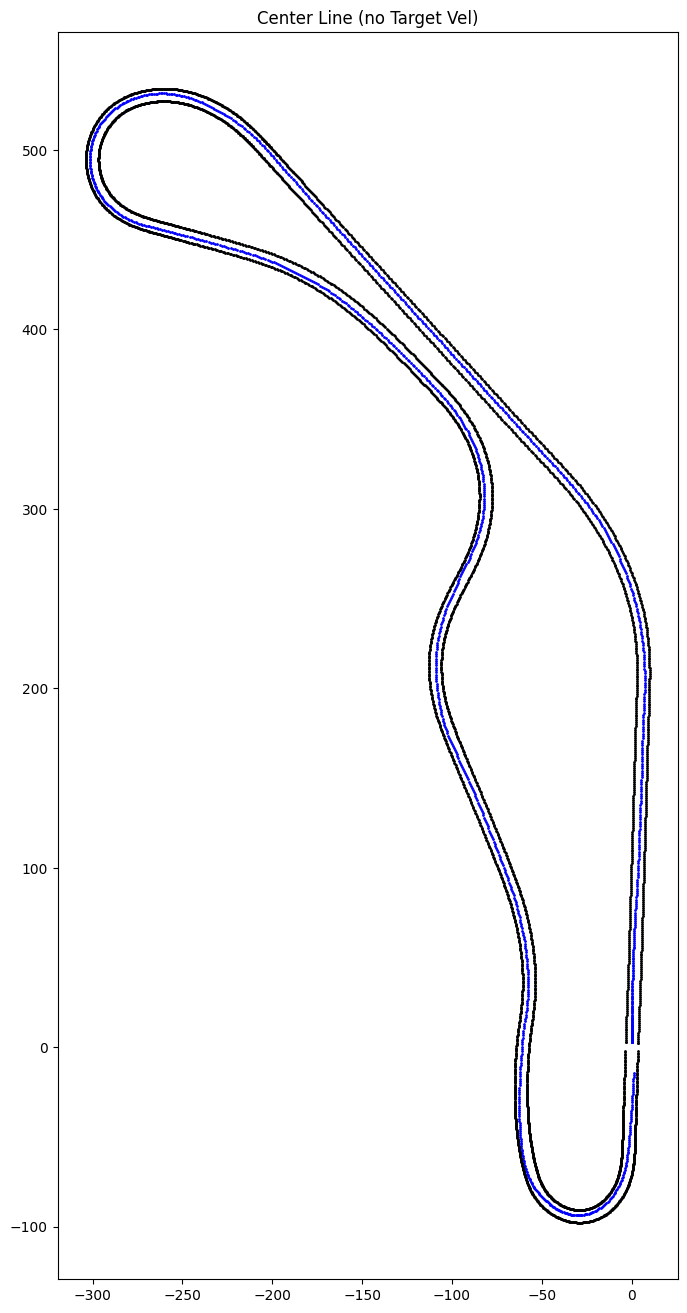

In [92]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

plt.title("Center Line (no Target Vel)")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [94]:
car_status = pickle.load(open(f"{root_path}/car_status.pkl", "rb"))
car_action = pickle.load(open(f"{root_path}/ActionDim3_RawAction.pkl", "rb"))

Text(0.5, 1.0, '$V_{x} (m/s)$')

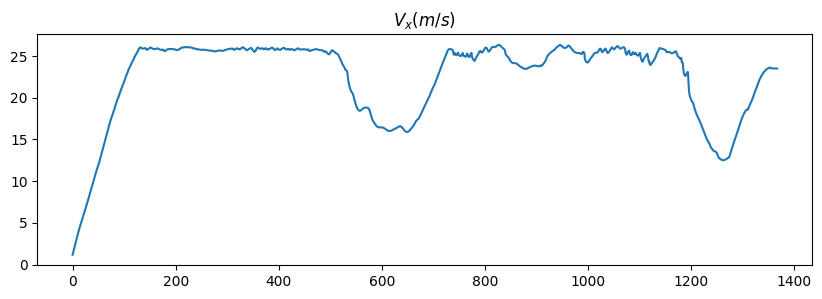

In [95]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(car_status).T[0])
plt.title("$V_{x} (m/s)$")

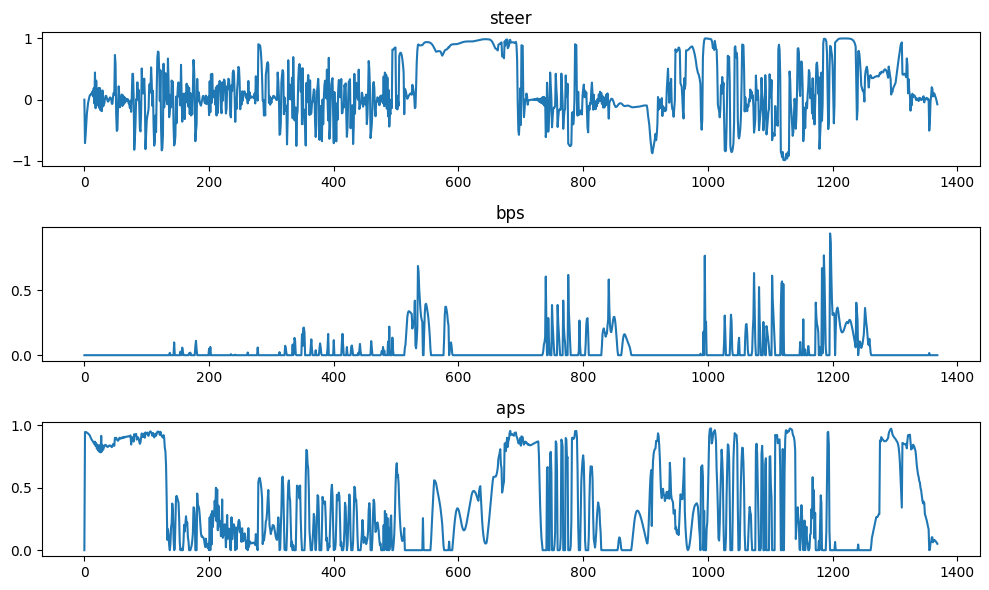

In [96]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(car_action['steer']);ax[0].set_title("steer")
ax[1].plot(car_action['brake_applied']);ax[1].set_title("bps")
ax[2].plot(car_action['throttle_applied']);ax[2].set_title("aps")
fig.tight_layout()

In [8]:
root_path = r'D:\meow_racer_experiments\nam_c_logs\0520_SingleFeet_BOTH_Act3_RACE_timePen_minVPen_offCnt\test\success_epoch_199'.replace('\\', '/')
# root_path = r'D:\meow_racer_experiments\nam_c_logs\0520_SingleFeet_BOTH_Act3_RACE_timePen_minVPen_offCnt\test\success_epoch_37'.replace('\\', '/')

pkl_name = f"{root_path}/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))

In [9]:
print(np.array(car_state).shape)

(5182, 3)


In [10]:
time_spent = np.array(car_state).shape[0] * 0.05
print(f"Time : {time_spent}sec")

Time : 259.1sec


In [11]:
car_status = pickle.load(open(f"{root_path}/car_status.pkl", "rb"))
car_action = pickle.load(open(f"{root_path}/ActionDim3_RawAction.pkl", "rb"))

Text(0.5, 1.0, '$V_{x} (m/s)$')

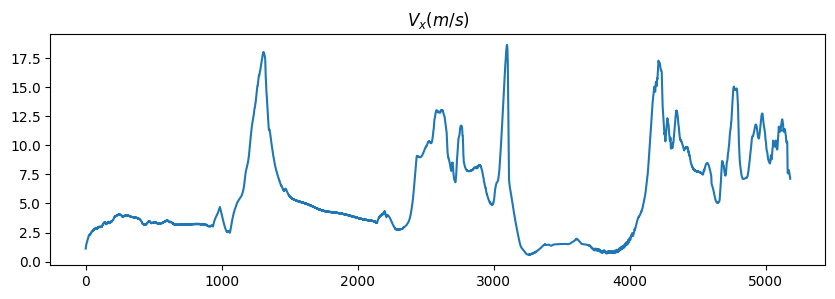

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(car_status).T[0])
plt.title("$V_{x} (m/s)$")

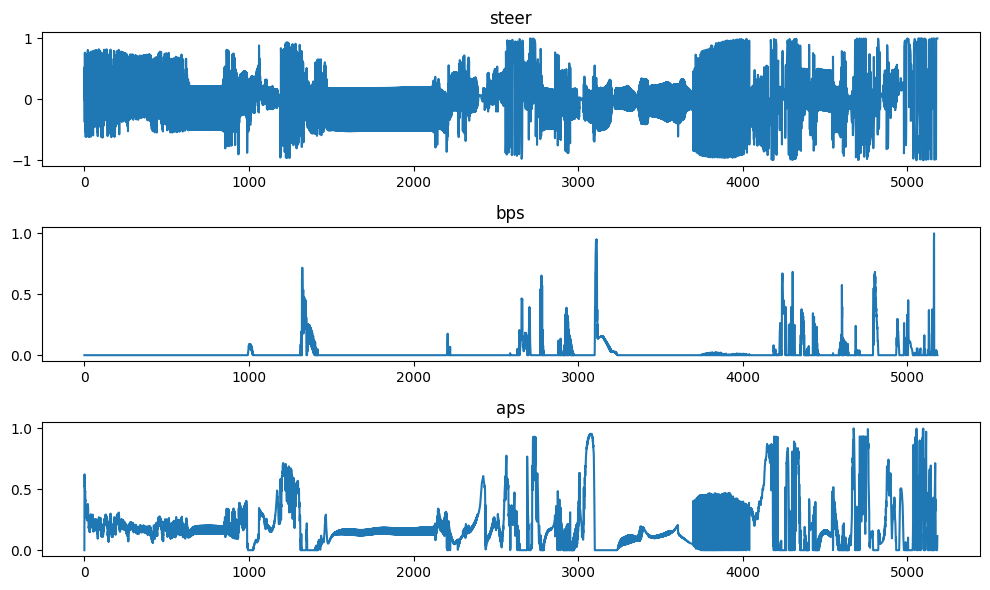

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(car_action['steer']);ax[0].set_title("steer")
ax[1].plot(car_action['brake_applied']);ax[1].set_title("bps")
ax[2].plot(car_action['throttle_applied']);ax[2].set_title("aps")
fig.tight_layout()

Text(0.5, 1.0, 'Racing (Trained with Random Tracks)')

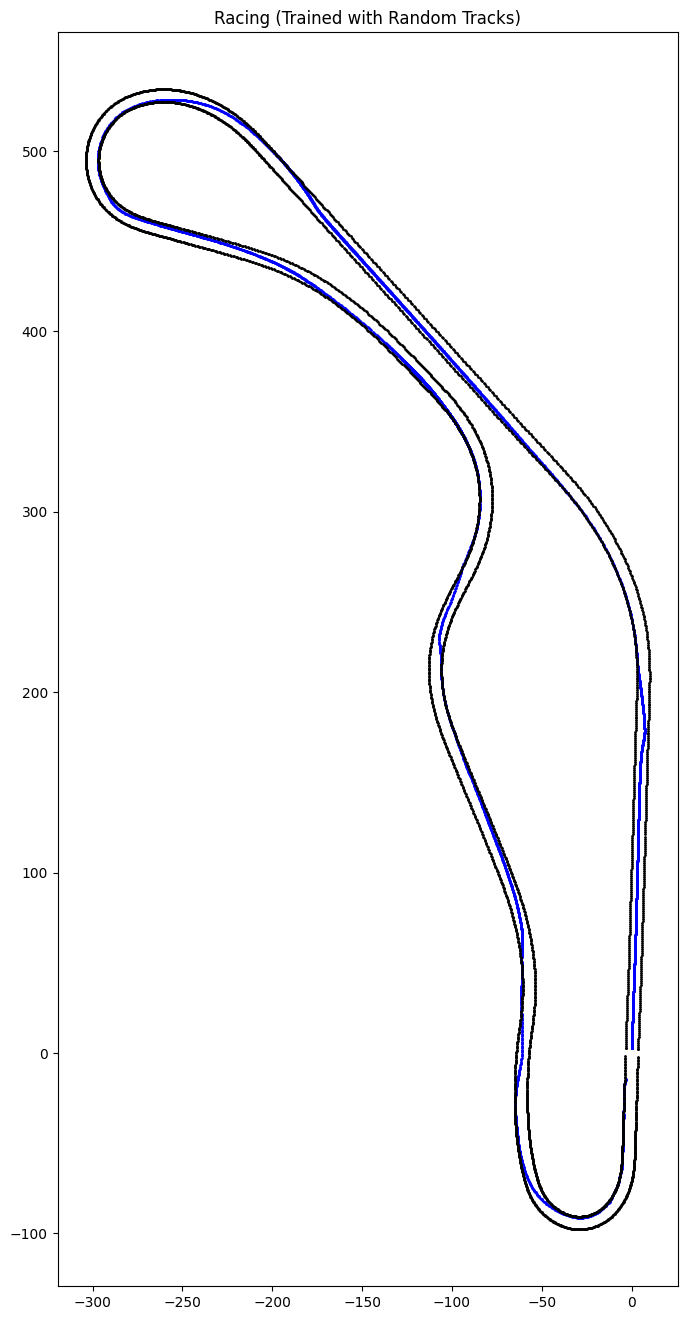

In [14]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

plt.title("Racing (Trained with Random Tracks)")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [77]:
import pickle
# root_path = r'D:\meow_racer_experiments\nam_c_logs\0522_SingleFeet_Nam_Act3_Center_targetVel_timePen_minVPen_offCnt_ProgressRewardCurve_negVelApsReward\test\success_epoch_32'.replace('\\', '/')
root_path = r'D:\meow_racer_experiments\nam_c_logs\0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3\test\success_epoch_32'.replace('\\', '/')
pkl_name = f"{root_path}/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))


Text(0.5, 1.0, 'Progress Reward RACE')

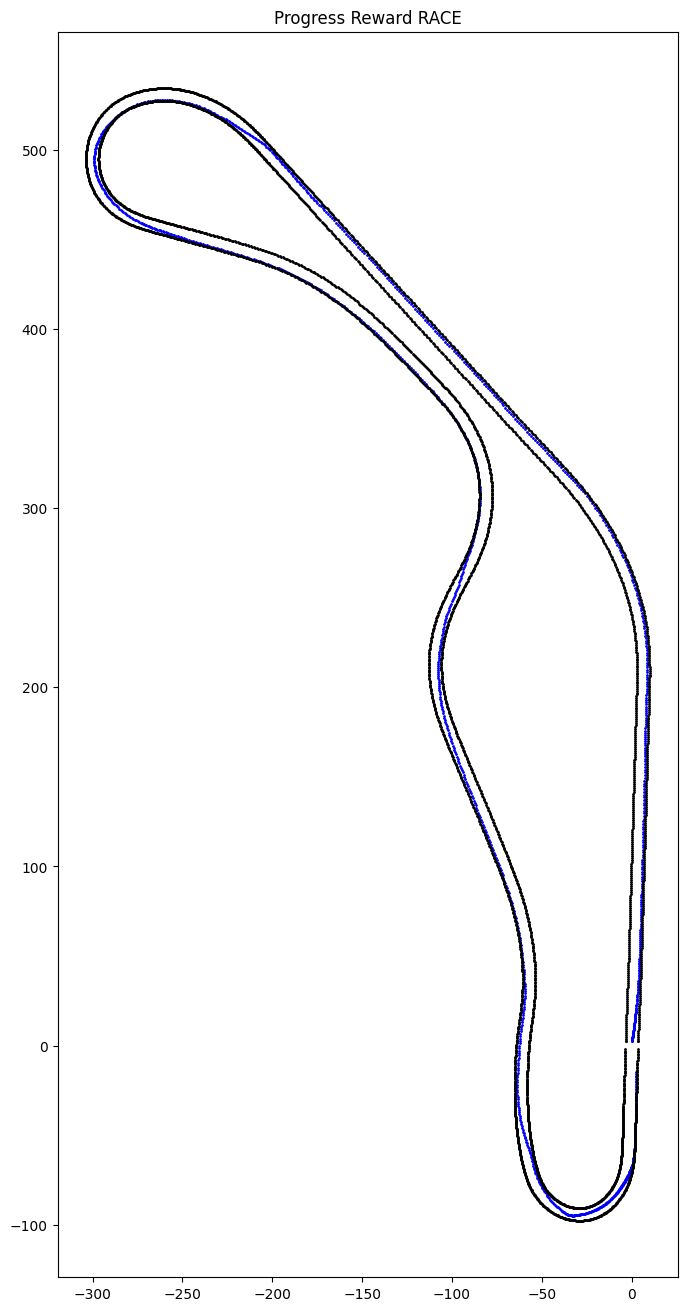

In [80]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

# plt.title("Center Line + Target Vel")
plt.title("Progress Reward RACE")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [81]:
car_status = pickle.load(open(f"{root_path}/car_status.pkl", "rb"))
car_action = pickle.load(open(f"{root_path}/ActionDim3_RawAction.pkl", "rb"))

Text(0.5, 1.0, '$V_{x} (m/s)$')

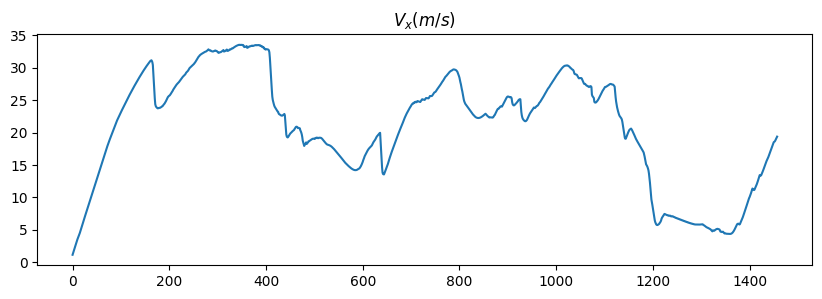

In [82]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(car_status).T[0])
plt.title("$V_{x} (m/s)$")

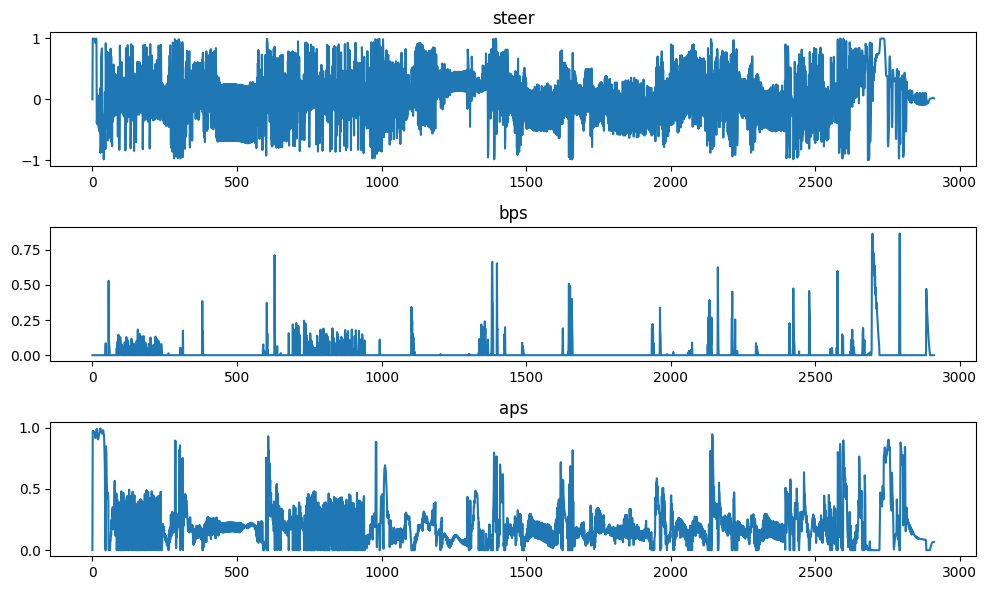

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(car_action['steer']);ax[0].set_title("steer")
ax[1].plot(car_action['brake_applied']);ax[1].set_title("bps")
ax[2].plot(car_action['throttle_applied']);ax[2].set_title("aps")
fig.tight_layout()

In [1]:
import pickle
# root_path  = r'D:\meow_racer_experiments\nam_c_logs\0522_SingleFeet_Nam_Act3_Center_targetVel_timePen_minVPen_offCnt_ProgressRewardCurve_negVelApsReward_Ec10_Trg15\test\success_epoch_43'.replace('\\', '/')
root_path = r'D:\meow_racer_experiments\nam_c_logs\0526_SingleFeet_Both_Act3_RACE_timePen01_minVPen_offCnt_NegVelAPSReward_TileCntReward5000_PrgRewardVel1_KappaV1_Ephi01\test\success_epoch_68'.replace('\\', '/')
pkl_name = f"{root_path}/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))

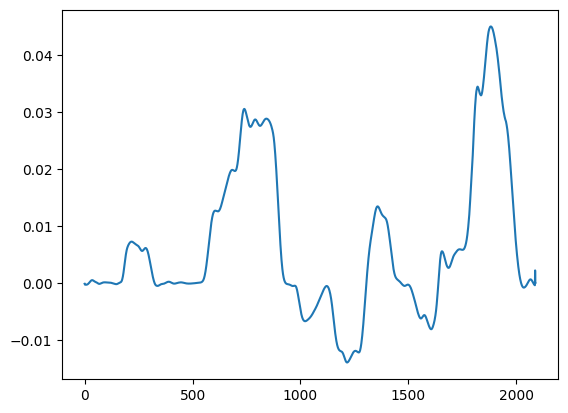

In [63]:
plt.plot(nam_track_dict['kappa'])

In [295]:
import pickle
import numpy as np
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0526_SingleFeet_Both_Act3_RACE_timePen01_minVPen_offCnt_NegVelAPSReward_TileCntReward5000_PrgRewardVel1_KappaV1_Ephi01\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0526_SingleFeet_RandOnly_Act3_RACE_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward500_KappaV1\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0526_SingleFeet_Both_Act3_RACE_timePen1_minVPen_offCnt_NegVelAPSReward_PrgRewardCrv30_KappaV1_Ephi01\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0531_SingleFeet_DTx50_Rand_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01\test'.replace('\\', '/')
# ROOT= r'D:\meow_racer_experiments\nam_c_logs\0525_SingleFeet_NamOnly_Act3_RACE_timePen1_minVPen_offCnt_NegVelAPSReward_PrgReward200_KappaV3\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0522_SingleFeet_Nam_Act3_Center_targetVel_timePen_minVPen_offCnt_ProgressRewardCurve_negVelApsReward_Ec10_Trg15\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0525_SingleFeet_Rand_Act3_Center_timePen_minVPen_offCnt_ProgressReward30_Ec10_TermV02\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_TileCntReward5000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0603_SingleFeet_DTx50_NAM_Defensive_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Ec10_TermV02_SmoothControl\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward5000_PrgRewardVel5_KappaV5_Ephi01_KappaWeightVelReward5\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0605_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0606_SingleFeet_DTx50_RANDOM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0606_SingleFeet_DTx50_NAM_Defensive_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Ec10_TermV02_SmoothControl\test'.replace('\\', '/')
ROOT = r'D:\meow_racer_experiments\nam_c_logs\0607_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_HCV2NormK\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0610_SingleFeet_DTx50_NAM_MEDIUM_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Weighted_2_PenTerm\test'.replace('\\', '/') #### -> Medium GOOD
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0611_SingleFeet_DTx50_NAM_MEDIUM_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Weighted_3_PenTermClippedKappa\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0611_SingleFeet_DTx50_NAM_MEDIUM_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Weighted_1_SameWeight\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0612_SingleFeet_DTx50_NAM_MEDIUM_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Weighted_3_SmallEphi_LargeAggWeight\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0613_SingleFeet_DTx50_NAM_MEDIUM_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Weighted_6_Ephi01_LargeAggWeight_Def02\test'.replace('\\', '/')
# ROOT = r'D:\meow_racer_experiments\nam_c_logs\0614_SingleFeet_DTx50_NAM_MEDIUM_Act3_Center_timePen_minVPen_offCnt_VelReward_ProgressReward1000_Weighted_100213_5_Ephi01_LargeAggWeight_Def02\test'.replace('\\', '/')
from glob import glob
from natsort import natsort
from tqdm import tqdm
success_paths = natsort.natsorted(glob(ROOT + "/success_*/car_state.pkl"))
sarsa_success_paths = natsort.natsorted(glob(ROOT + "/success_*/sarsa.pkl"))
# loop = tqdm(success_paths)
loop = tqdm(zip(success_paths, sarsa_success_paths))
time_arr = []
reward_arr = []
# for p in loop:
for p, sarsa_p in loop:
    cs = pickle.load(open(p, 'rb'))
    sarsa = pickle.load(open(sarsa_p, 'rb'))
    time_spent = np.array(cs).shape[0] * 0.05
    time_arr.append(time_spent)
    # loop.set_postfix({"Lap Time": time_spent})
    print(f"Lap Time: {time_spent}sec")

2it [00:01,  2.04it/s]

Lap Time: 75.8sec
Lap Time: 81.80000000000001sec
Lap Time: 76.80000000000001sec


4it [00:01,  4.18it/s]

Lap Time: 77.80000000000001sec


7it [00:02,  4.27it/s]

Lap Time: 75.85000000000001sec
Lap Time: 76.7sec
Lap Time: 78.55000000000001sec


10it [00:02,  7.07it/s]

Lap Time: 77.55000000000001sec
Lap Time: 72.55sec
Lap Time: 75.65sec
Lap Time: 74.8sec
Lap Time: 71.7sec


15it [00:02, 11.58it/s]

Lap Time: 73.60000000000001sec
Lap Time: 74.10000000000001sec
Lap Time: 76.35000000000001sec
Lap Time: 72.45sec


20it [00:02, 15.72it/s]

Lap Time: 75.0sec
Lap Time: 74.75sec
Lap Time: 70.65sec
Lap Time: 73.4sec


22it [00:02, 16.24it/s]

Lap Time: 68.55sec
Lap Time: 72.10000000000001sec
Lap Time: 73.15sec


24it [00:03, 13.12it/s]

Lap Time: 69.95sec
Lap Time: 74.2sec


28it [00:03, 10.96it/s]

Lap Time: 72.60000000000001sec
Lap Time: 70.75sec
Lap Time: 69.2sec


32it [00:03, 12.51it/s]

Lap Time: 71.4sec
Lap Time: 68.60000000000001sec
Lap Time: 74.8sec
Lap Time: 71.4sec


35it [00:04, 14.03it/s]

Lap Time: 68.9sec
Lap Time: 70.55sec
Lap Time: 66.7sec
Lap Time: 72.85000000000001sec


39it [00:04, 13.69it/s]

Lap Time: 68.45sec
Lap Time: 69.4sec
Lap Time: 67.5sec


43it [00:04, 14.00it/s]

Lap Time: 67.4sec
Lap Time: 71.15sec
Lap Time: 69.2sec
Lap Time: 70.45sec


46it [00:04, 16.68it/s]

Lap Time: 68.9sec
Lap Time: 65.95sec
Lap Time: 73.45sec
Lap Time: 68.3sec
Lap Time: 66.95sec


52it [00:05, 19.32it/s]

Lap Time: 66.55sec
Lap Time: 70.2sec
Lap Time: 70.8sec
Lap Time: 68.0sec


56it [00:05, 16.93it/s]

Lap Time: 69.95sec
Lap Time: 72.05sec
Lap Time: 67.3sec
Lap Time: 69.55sec


58it [00:05, 16.03it/s]

Lap Time: 74.10000000000001sec
Lap Time: 65.2sec
Lap Time: 71.10000000000001sec


62it [00:05, 16.35it/s]

Lap Time: 68.9sec
Lap Time: 68.10000000000001sec
Lap Time: 68.7sec


64it [00:05, 13.66it/s]

Lap Time: 68.05sec
Lap Time: 65.7sec
Lap Time: 69.35000000000001sec


68it [00:06, 14.19it/s]

Lap Time: 66.25sec
Lap Time: 69.45sec
Lap Time: 68.4sec
Lap Time: 66.65sec


72it [00:06, 13.73it/s]

Lap Time: 64.4sec
Lap Time: 69.2sec
Lap Time: 68.15sec


74it [00:06, 13.54it/s]

Lap Time: 64.25sec
Lap Time: 64.4sec
Lap Time: 70.05sec


78it [00:06, 14.58it/s]

Lap Time: 64.55sec
Lap Time: 64.75sec
Lap Time: 65.3sec
Lap Time: 66.65sec


82it [00:07, 12.57it/s]

Lap Time: 66.55sec
Lap Time: 64.55sec
Lap Time: 64.65sec


84it [00:07, 13.00it/s]

Lap Time: 65.55sec
Lap Time: 64.7sec


88it [00:07, 11.69it/s]

Lap Time: 62.45sec
Lap Time: 64.5sec
Lap Time: 64.8sec
Lap Time: 62.650000000000006sec


92it [00:08, 11.38it/s]

Lap Time: 64.0sec
Lap Time: 66.05sec
Lap Time: 64.45sec
Lap Time: 63.400000000000006sec


95it [00:08, 13.92it/s]

Lap Time: 63.85sec
Lap Time: 63.95sec
Lap Time: 63.95sec
Lap Time: 63.800000000000004sec


99it [00:08, 14.88it/s]

Lap Time: 63.5sec
Lap Time: 66.9sec
Lap Time: 65.10000000000001sec
Lap Time: 63.650000000000006sec


103it [00:08, 15.89it/s]

Lap Time: 64.45sec
Lap Time: 63.900000000000006sec
Lap Time: 64.35000000000001sec


105it [00:09, 14.02it/s]

Lap Time: 63.150000000000006sec
Lap Time: 64.65sec
Lap Time: 64.05sec


109it [00:09, 14.02it/s]

Lap Time: 63.650000000000006sec
Lap Time: 63.800000000000004sec
Lap Time: 63.550000000000004sec


113it [00:09, 15.63it/s]

Lap Time: 64.05sec
Lap Time: 65.9sec
Lap Time: 64.45sec
Lap Time: 64.25sec


115it [00:09, 13.93it/s]

Lap Time: 63.45sec
Lap Time: 66.10000000000001sec


117it [00:09, 12.64it/s]

Lap Time: 64.65sec
Lap Time: 65.5sec


119it [00:10, 10.01it/s]

Lap Time: 64.2sec
Lap Time: 63.75sec
Lap Time: 64.3sec


123it [00:10, 12.23it/s]

Lap Time: 64.0sec
Lap Time: 64.3sec
Lap Time: 63.7sec
Lap Time: 63.95sec


128it [00:10, 15.41it/s]

Lap Time: 65.0sec
Lap Time: 65.60000000000001sec
Lap Time: 63.050000000000004sec
Lap Time: 64.85000000000001sec
Lap Time: 63.800000000000004sec
Lap Time: 63.35sec


132it [00:10, 18.97it/s]

Lap Time: 62.75sec
Lap Time: 63.95sec
Lap Time: 65.5sec
Lap Time: 64.25sec


137it [00:11, 16.39it/s]

Lap Time: 64.35000000000001sec
Lap Time: 63.35sec
Lap Time: 65.2sec
Lap Time: 63.5sec


143it [00:11, 21.66it/s]

Lap Time: 68.5sec
Lap Time: 68.25sec
Lap Time: 63.85sec
Lap Time: 64.8sec
Lap Time: 64.75sec
Lap Time: 65.3sec
Lap Time: 64.55sec
Lap Time: 63.25sec


150it [00:11, 24.35it/s]

Lap Time: 64.25sec
Lap Time: 63.300000000000004sec
Lap Time: 65.60000000000001sec
Lap Time: 65.3sec
Lap Time: 65.3sec


153it [00:11, 19.97it/s]

Lap Time: 65.60000000000001sec
Lap Time: 64.45sec
Lap Time: 64.5sec
Lap Time: 63.95sec


159it [00:12, 19.85it/s]

Lap Time: 63.550000000000004sec
Lap Time: 65.15sec
Lap Time: 64.3sec
Lap Time: 65.95sec
Lap Time: 65.25sec
Lap Time: 63.7sec
Lap Time: 65.0sec


167it [00:12, 25.67it/s]

Lap Time: 66.10000000000001sec
Lap Time: 64.4sec
Lap Time: 66.10000000000001sec
Lap Time: 64.7sec
Lap Time: 64.15sec
Lap Time: 67.3sec
Lap Time: 66.05sec


174it [00:12, 28.34it/s]

Lap Time: 67.65sec
Lap Time: 65.15sec
Lap Time: 65.75sec
Lap Time: 65.2sec
Lap Time: 63.2sec
Lap Time: 64.60000000000001sec
Lap Time: 65.10000000000001sec
Lap Time: 63.95sec


182it [00:12, 29.16it/s]

Lap Time: 65.3sec
Lap Time: 65.9sec
Lap Time: 62.550000000000004sec
Lap Time: 63.45sec
Lap Time: 64.55sec
Lap Time: 64.10000000000001sec


189it [00:13, 29.17it/s]

Lap Time: 63.150000000000006sec
Lap Time: 66.8sec
Lap Time: 64.15sec
Lap Time: 63.5sec
Lap Time: 63.85sec
Lap Time: 65.7sec
Lap Time: 66.2sec


192it [00:13, 25.62it/s]

Lap Time: 68.10000000000001sec
Lap Time: 63.900000000000006sec
Lap Time: 64.3sec
Lap Time: 65.85000000000001sec


195it [00:13, 15.35it/s]

Lap Time: 63.1sec
Lap Time: 64.75sec
Lap Time: 66.55sec


198it [00:14, 12.14it/s]

Lap Time: 64.65sec
Lap Time: 63.35sec


200it [00:14,  9.70it/s]

Lap Time: 64.0sec
Lap Time: 64.10000000000001sec


202it [00:15,  5.10it/s]

Lap Time: 64.95sec


205it [00:16,  5.27it/s]

Lap Time: 65.7sec
Lap Time: 63.75sec
Lap Time: 63.150000000000006sec


206it [00:16,  5.08it/s]

Lap Time: 64.10000000000001sec


208it [00:16,  4.93it/s]

Lap Time: 63.25sec
Lap Time: 63.85sec


209it [00:16,  5.06it/s]

Lap Time: 67.25sec


211it [00:17,  4.69it/s]

Lap Time: 65.15sec
Lap Time: 65.05sec


213it [00:18,  3.20it/s]

Lap Time: 64.05sec
Lap Time: 63.800000000000004sec


214it [00:18,  3.79it/s]

Lap Time: 64.75sec


216it [00:19,  3.85it/s]

Lap Time: 63.75sec
Lap Time: 66.05sec


217it [00:19,  3.85it/s]

Lap Time: 63.95sec


218it [00:19,  3.62it/s]

Lap Time: 64.2sec


220it [00:20,  3.94it/s]

Lap Time: 64.4sec
Lap Time: 62.75sec


221it [00:20,  3.94it/s]

Lap Time: 63.2sec


223it [00:21,  3.67it/s]

Lap Time: 65.05sec
Lap Time: 64.75sec


224it [00:21,  3.86it/s]

Lap Time: 66.25sec


225it [00:21,  3.24it/s]

Lap Time: 63.25sec


226it [00:21,  3.31it/s]

Lap Time: 63.85sec


228it [00:22,  3.84it/s]

Lap Time: 64.4sec
Lap Time: 63.85sec


230it [00:22,  4.87it/s]

Lap Time: 64.7sec
Lap Time: 64.2sec


233it [00:23,  7.08it/s]

Lap Time: 65.8sec
Lap Time: 65.2sec
Lap Time: 63.35sec


235it [00:23,  6.88it/s]

Lap Time: 63.85sec
Lap Time: 64.8sec


237it [00:23,  7.22it/s]

Lap Time: 63.150000000000006sec
Lap Time: 63.300000000000004sec


240it [00:23,  8.63it/s]

Lap Time: 64.65sec
Lap Time: 64.25sec
Lap Time: 64.75sec


242it [00:24,  9.46it/s]

Lap Time: 65.25sec
Lap Time: 65.95sec
Lap Time: 72.95sec


244it [00:24,  9.02it/s]

Lap Time: 67.25sec


247it [00:24,  9.45it/s]

Lap Time: 75.60000000000001sec
Lap Time: 66.7sec
Lap Time: 64.9sec


249it [00:25,  7.15it/s]

Lap Time: 63.5sec
Lap Time: 64.85000000000001sec


250it [00:25,  6.83it/s]

Lap Time: 63.800000000000004sec


253it [00:25,  6.63it/s]

Lap Time: 62.300000000000004sec
Lap Time: 63.25sec
Lap Time: 64.35000000000001sec


257it [00:26, 10.06it/s]

Lap Time: 62.550000000000004sec
Lap Time: 65.60000000000001sec
Lap Time: 64.2sec
Lap Time: 64.35000000000001sec


259it [00:26, 10.42it/s]

Lap Time: 63.300000000000004sec
Lap Time: 64.9sec
Lap Time: 64.10000000000001sec


261it [00:26, 11.50it/s]

Lap Time: 64.3sec
Lap Time: 63.550000000000004sec


265it [00:26, 10.42it/s]

Lap Time: 65.95sec
Lap Time: 63.650000000000006sec
Lap Time: 64.15sec


267it [00:27, 10.61it/s]

Lap Time: 65.45sec
Lap Time: 64.0sec


269it [00:27, 10.27it/s]

Lap Time: 62.45sec
Lap Time: 62.050000000000004sec
Lap Time: 64.0sec


273it [00:27, 13.29it/s]

Lap Time: 62.050000000000004sec
Lap Time: 62.85sec
Lap Time: 64.35000000000001sec


277it [00:27, 13.88it/s]

Lap Time: 64.10000000000001sec
Lap Time: 65.60000000000001sec
Lap Time: 63.45sec
Lap Time: 63.0sec


279it [00:27, 12.38it/s]

Lap Time: 63.650000000000006sec
Lap Time: 62.5sec
Lap Time: 62.900000000000006sec


283it [00:28, 12.09it/s]

Lap Time: 64.5sec
Lap Time: 64.0sec
Lap Time: 64.25sec


285it [00:28,  9.99it/s]

Lap Time: 63.85sec
Lap Time: 64.0sec


289it [00:28, 12.18it/s]

Lap Time: 62.550000000000004sec
Lap Time: 64.15sec
Lap Time: 62.550000000000004sec
Lap Time: 63.800000000000004sec


293it [00:28, 17.87it/s]

Lap Time: 67.65sec
Lap Time: 64.4sec
Lap Time: 64.5sec
Lap Time: 63.650000000000006sec
Lap Time: 63.85sec
Lap Time: 64.75sec


299it [00:29, 20.45it/s]

Lap Time: 63.7sec
Lap Time: 65.10000000000001sec
Lap Time: 63.5sec
Lap Time: 64.0sec
Lap Time: 63.400000000000006sec
Lap Time: 65.5sec
Lap Time: 65.95sec
Lap Time: 65.10000000000001sec


307it [00:29, 26.23it/s]

Lap Time: 65.95sec
Lap Time: 64.25sec
Lap Time: 64.9sec
Lap Time: 65.35000000000001sec
Lap Time: 62.300000000000004sec


310it [00:29, 25.77it/s]

Lap Time: 63.5sec
Lap Time: 63.75sec
Lap Time: 63.45sec
Lap Time: 63.150000000000006sec


313it [00:29, 20.29it/s]

Lap Time: 62.45sec
Lap Time: 62.6sec


316it [00:30, 12.52it/s]

Lap Time: 63.2sec
Lap Time: 62.800000000000004sec


318it [00:30, 12.64it/s]

Lap Time: 63.5sec
Lap Time: 63.2sec


320it [00:30, 13.26it/s]

Lap Time: 63.6sec
Lap Time: 61.900000000000006sec
Lap Time: 62.75sec


324it [00:30, 14.06it/s]

Lap Time: 63.400000000000006sec
Lap Time: 65.9sec
Lap Time: 63.550000000000004sec
Lap Time: 62.35sec
Lap Time: 63.25sec
Lap Time: 62.6sec


332it [00:30, 23.69it/s]

Lap Time: 65.75sec
Lap Time: 63.0sec
Lap Time: 64.10000000000001sec
Lap Time: 62.400000000000006sec
Lap Time: 63.550000000000004sec
Lap Time: 63.0sec
Lap Time: 63.85sec
Lap Time: 63.400000000000006sec
Lap Time: 62.85sec


341it [00:31, 30.15it/s]

Lap Time: 62.95sec
Lap Time: 62.95sec
Lap Time: 63.0sec
Lap Time: 62.5sec
Lap Time: 65.05sec
Lap Time: 62.45sec
Lap Time: 62.6sec
Lap Time: 62.050000000000004sec


351it [00:31, 35.17it/s]

Lap Time: 62.75sec
Lap Time: 63.0sec
Lap Time: 62.900000000000006sec
Lap Time: 62.25sec
Lap Time: 62.75sec
Lap Time: 62.5sec
Lap Time: 63.1sec
Lap Time: 61.5sec


359it [00:31, 33.40it/s]

Lap Time: 61.400000000000006sec
Lap Time: 62.400000000000006sec
Lap Time: 63.150000000000006sec
Lap Time: 61.95sec
Lap Time: 63.650000000000006sec
Lap Time: 63.050000000000004sec
Lap Time: 62.7sec
Lap Time: 62.550000000000004sec


363it [00:31, 29.03it/s]

Lap Time: 62.75sec
Lap Time: 63.550000000000004sec
Lap Time: 62.150000000000006sec
Lap Time: 62.1sec


367it [00:32, 23.32it/s]

Lap Time: 62.35sec
Lap Time: 63.35sec
Lap Time: 62.7sec
Lap Time: 63.550000000000004sec


370it [00:32, 18.15it/s]

Lap Time: 62.95sec
Lap Time: 62.550000000000004sec


373it [00:32, 15.60it/s]

Lap Time: 62.900000000000006sec
Lap Time: 62.550000000000004sec
Lap Time: 62.6sec


375it [00:32, 14.96it/s]

Lap Time: 62.7sec
Lap Time: 63.900000000000006sec
Lap Time: 62.1sec


379it [00:33, 13.10it/s]

Lap Time: 61.050000000000004sec
Lap Time: 63.800000000000004sec
Lap Time: 63.95sec


381it [00:33, 13.68it/s]

Lap Time: 62.5sec
Lap Time: 64.0sec
Lap Time: 63.900000000000006sec


385it [00:33, 14.22it/s]

Lap Time: 62.800000000000004sec
Lap Time: 63.900000000000006sec
Lap Time: 63.7sec
Lap Time: 63.6sec


389it [00:33, 13.71it/s]

Lap Time: 65.45sec
Lap Time: 65.3sec
Lap Time: 64.0sec
Lap Time: 63.0sec


393it [00:34, 13.16it/s]

Lap Time: 64.2sec
Lap Time: 62.95sec
Lap Time: 61.75sec


396it [00:34, 13.18it/s]

Lap Time: 63.300000000000004sec
Lap Time: 62.35sec
Lap Time: 62.35sec


397it [00:34, 11.48it/s]

Lap Time: 62.7sec


In [296]:
idx = np.argmin(time_arr)
# idx = np.argsort(time_arr)[2]
# idx = 30 # 10
car_state = pickle.load(open(success_paths[idx], 'rb'))
time_spent = np.array(car_state).shape[0] * 0.05
print(f"Lap Time: {time_spent}sec")
print(f'Epoch: {success_paths[idx]}')

Lap Time: 61.050000000000004sec
Epoch: D:/meow_racer_experiments/nam_c_logs/0607_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_HCV2NormK/test\success_epoch_434\car_state.pkl


Text(0.5, 1.0, 'Racing-Progress Reward Hard')

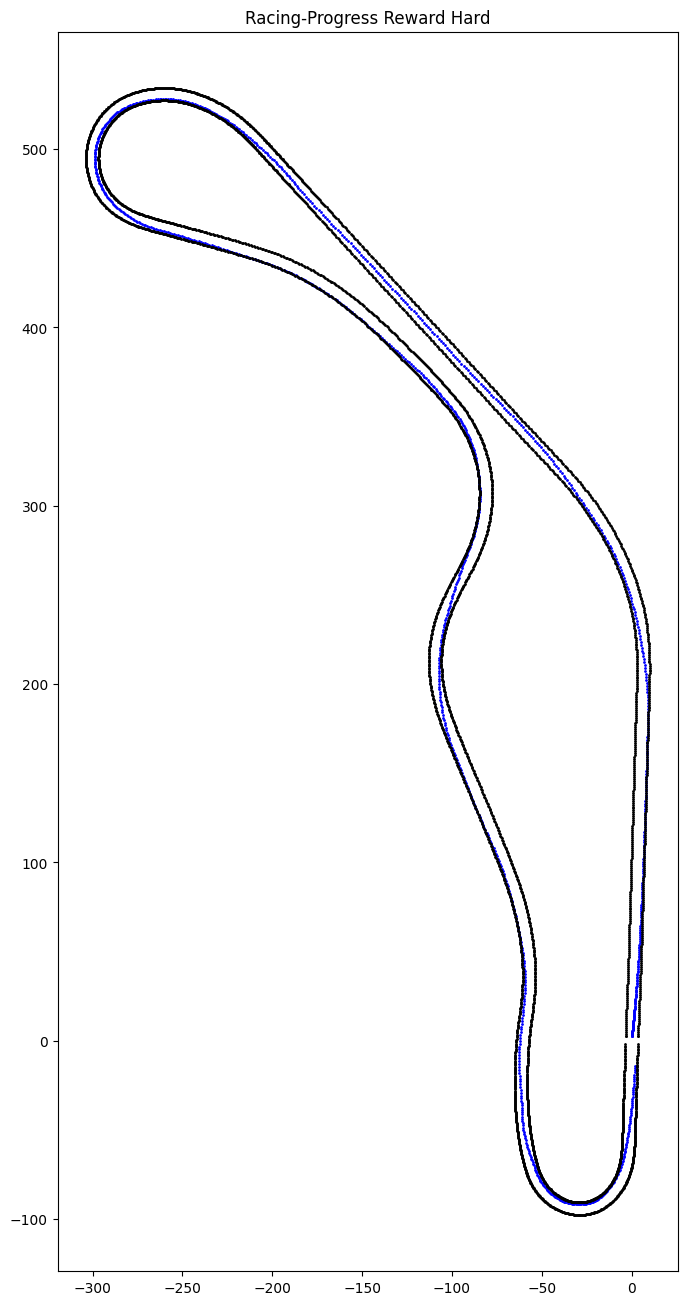

In [297]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

# plt.title("Racing-Tile Step Count")
# plt.title("Racing-Progress Reward")
# plt.title("Racing-Defensive")
plt.title("Racing-Progress Reward Hard")
# plt.title("Racing-Progress Reward Medium")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [ ]:
root_path = os.path.dirname(success_paths[idx])
car_status = pickle.load(open(f"{root_path}/car_status.pkl", "rb"))
car_action = pickle.load(open(f"{root_path}/ActionDim3_RawAction.pkl", "rb"))


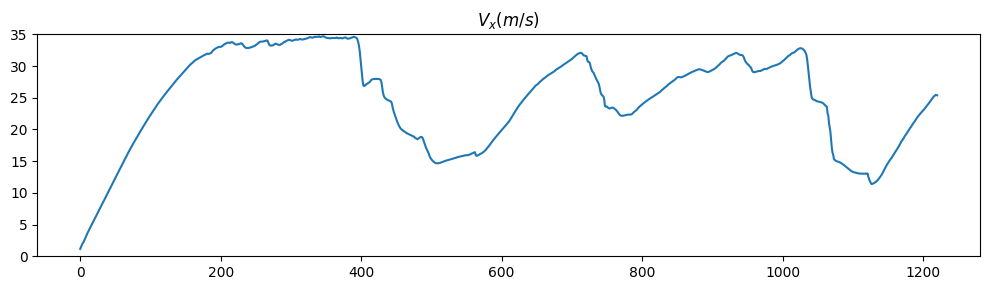

In [299]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(car_status).T[0])
ax.set_ylim(0, 35)
plt.title("$V_{x} (m/s)$")
fig.tight_layout()

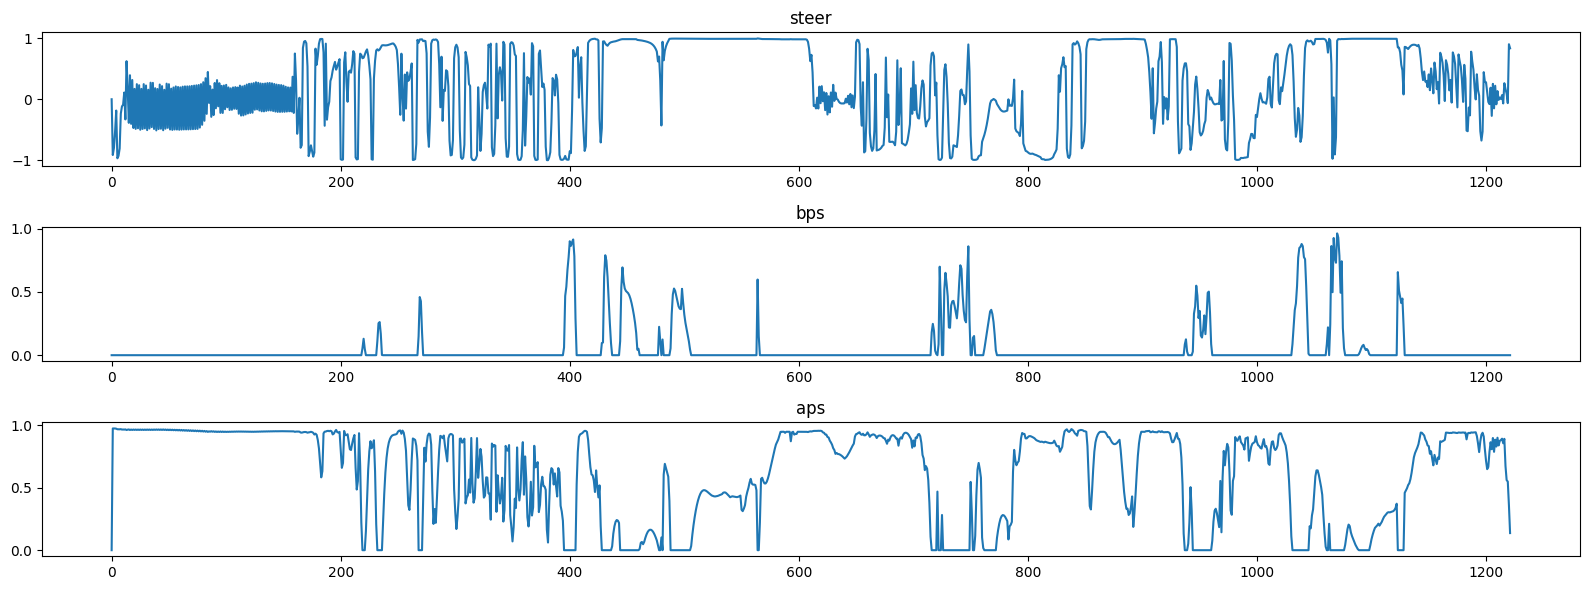

In [300]:
fig, ax = plt.subplots(3, 1, figsize=(16, 6))
ax[0].plot(car_action['steer']);ax[0].set_title("steer")
ax[1].plot(car_action['brake_applied']);ax[1].set_title("bps")
ax[2].plot(car_action['throttle_applied']);ax[2].set_title("aps")
fig.tight_layout()

In [1]:
import pickle
root_path = r'D:\meow_racer_experiments\nam_c_logs\0522_SingleFeet_RandOnly_Act3_RACE_timePen1_minVPen_offCnt_NegVelAPSReward_PrgReward20\test\success_epoch_45'.replace('\\', '/')
pkl_name = f"{root_path}/car_state.pkl"
car_state = pickle.load(open(pkl_name, 'rb'))


In [4]:
time_spent = np.array(car_state).shape[0] * 0.05
print(f"Lap Time: {time_spent}sec")

Lap Time: 141.1sec


Text(0.5, 1.0, 'Center Line + Target Vel')

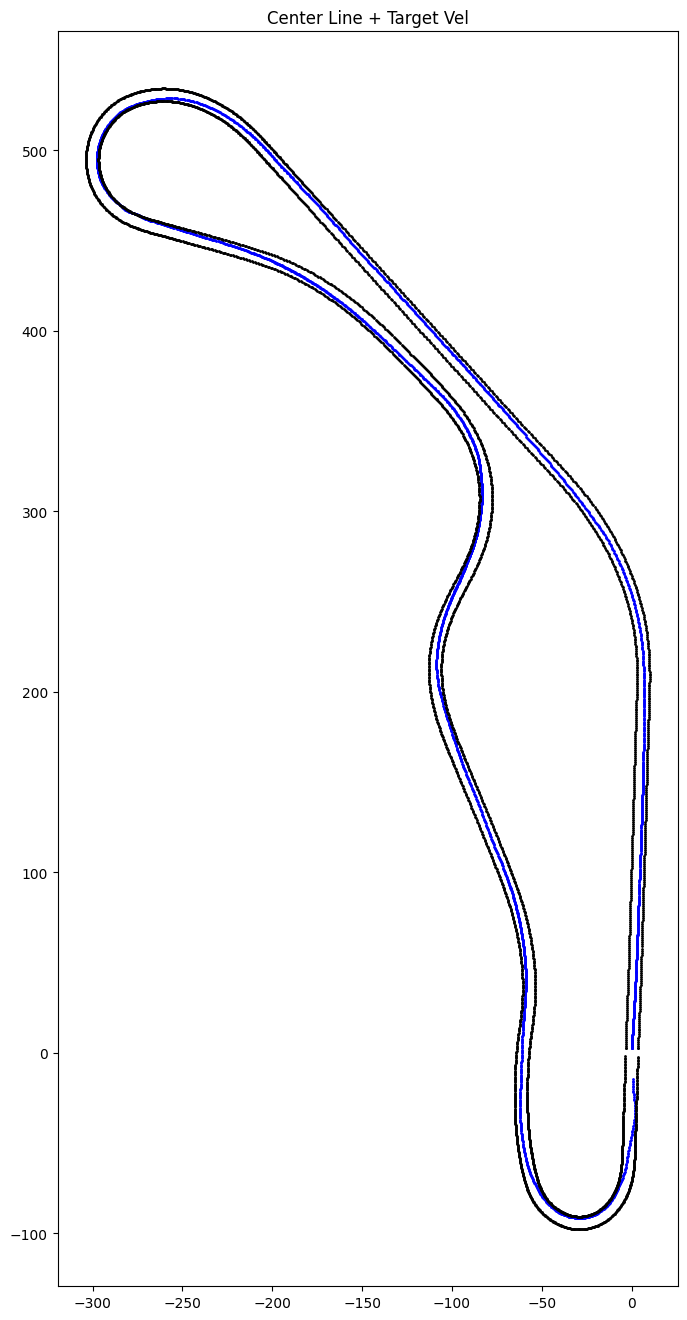

In [3]:
import matplotlib.pyplot as plt
X, Y = np.array(car_state).T[0], np.array(car_state).T[1]
mx, Mx = min(X), max(X)
my, My = min(Y), max(Y)
row = 8
col = row * ((My-my) / (Mx-mx))
fig, ax = plt.subplots(figsize=(row, col))
plt.scatter(X, Y, s=1, c='b')
Lx, Ly = nam_track_dict['left'][:, 0], nam_track_dict['left'][:, 1]
Rx, Ry = nam_track_dict['right'][:, 0], nam_track_dict['right'][:, 1]
plt.scatter(Lx, Ly, s=1, c='k')
plt.scatter(Rx, Ry, s=1, c='k')

plt.title("Center Line + Target Vel")
# plt.scatter(nam_track_cfg['x'], nam_track_cfg['y'], s=1, c='k')

In [78]:
vehicle_speed = 10
target_vel = 11
reward_weight = 10
give_penalty_to_out_dist = True
use_hard_penalty = False
gauss_sigma = 1

reward = 0

if target_vel - gauss_sigma <= vehicle_speed <= target_vel + gauss_sigma:
    reward = np.exp(
        -0.5 * ((vehicle_speed - target_vel) / gauss_sigma) ** 2
    ) 
##reward인 만큼, 목표 target velocity부터 차이가 많이 나는 값인 경우에 penalty를 크게 주거나, reward를 그냥 0으로 두는 것도 방법.
##대신 동시에 movement에 대한 reward도 추가로 주면 이동 + 목표 속도 도달을 할 때 reward가 크다는 것을 학습할 수 있을 것.
else:
    if give_penalty_to_out_dist:
        if vehicle_speed > target_vel + gauss_sigma: #가속하는 경우
            thresh_speed = target_vel + gauss_sigma
            if use_hard_penalty:
                ratio = (vehicle_speed / thresh_speed) - 1
            else:
                # ratio = 1 - (thresh_speed / vehicle_speed)
                diff = vehicle_speed - thresh_speed
                ratio = diff / thresh_speed
            reward = -1 * ratio
        # else: #감속하는 경우
        elif vehicle_speed < target_vel - gauss_sigma:
            thresh_speed = target_vel - gauss_sigma
            if use_hard_penalty:
                ratio = (thresh_speed / vehicle_speed) - 1
                if vehicle_speed == 0:
                    ratio = thresh_speed
            else:
                diff = thresh_speed - vehicle_speed
                ratio = diff / thresh_speed
                # if vehicle_speed == 0:
                #     ratio = thresh_speed
                # else:
                #     ratio = (thresh_speed / vehicle_speed) - 1
                # if vehicle_speed == 0:
                #     ratio = 1
                # else:
                #     ratio = 1 - (vehicle_speed / thresh_speed)
                    
            reward = -1 * ratio 
reward *= reward_weight 


print(f"REWARD : {reward}")

REWARD : 6.065306597126334


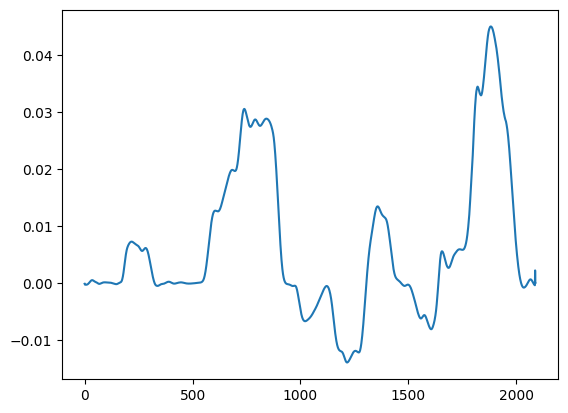

In [ ]:
plt.plot(nam_track_dict['kappa']) ##이 부근에서 속도가 늦어지는 이유

In [ ]:
20 / (1  + 0.04 * 5) ##곡률이 큰 구간에서도 속도가 너무 낮아지지 않도록 하는게 필요함. 그래서 곡률이 큰 구간에서도 빨리 통과 할 수 있도록 학습 하는 것이 중요.

14.285714285714286

In [75]:
20 / (1 + 0.004 * 5)

19.607843137254903

In [137]:
nam_track_dict.keys()

dict_keys(['theta', 'phi', 'beta', 'kappa', 'x', 'y', 'vertices', 'left', 'right', 'passed'])

In [ ]:
from scipy.interpolate import interp1d

def _recommend_vel_arr(track_dict: dict, 
                       target_theta: float, 
                       fix: bool=False):
    mu = 1
    gravity = 9.81
    max_vx = 200 / 3.6

    track_X, track_Y = track_dict['x'], track_dict['y']
    track_Kappa = track_dict['kappa']
    track_Theta = track_dict['theta']
    
    vehicle_speed = 10 #35 #25
    
    kappa_spline = interp1d(track_Theta, track_Kappa, kind='linear', fill_value='extrapolate')
    vel_arr = []
    reward_arr = []
    
    for i, (tx, ty, tk, tt) in enumerate(zip(track_X, track_Y, track_Kappa, track_Theta)):
        target_kappa = 0
        for theta_diff in range(target_theta):
            target_kappa += abs(kappa_spline(tt + theta_diff))
        target_kappa /= target_theta
 
        if target_kappa < 1e-5:
            recommend_vel = max_vx
        else:
            recommend_vel = np.sqrt((mu * gravity) / target_kappa)
        if fix:
            recommend_vel = min(recommend_vel, max_vx)
        vel_arr.append(recommend_vel)
            
        speed_ratio = vehicle_speed / recommend_vel
        reward = np.exp(-abs(speed_ratio - 1))
        reward_arr.append(reward)
        
    return vel_arr, reward_arr

In [177]:
vel_arr, reward_arr = _recommend_vel_arr(track_dict=nam_track_dict,
                             target_theta=20,
                             fix=False)

In [183]:
vel_arr_fixed, reward_arr_fixed = _recommend_vel_arr(track_dict=nam_track_dict,
                             target_theta=20,
                             fix=True)

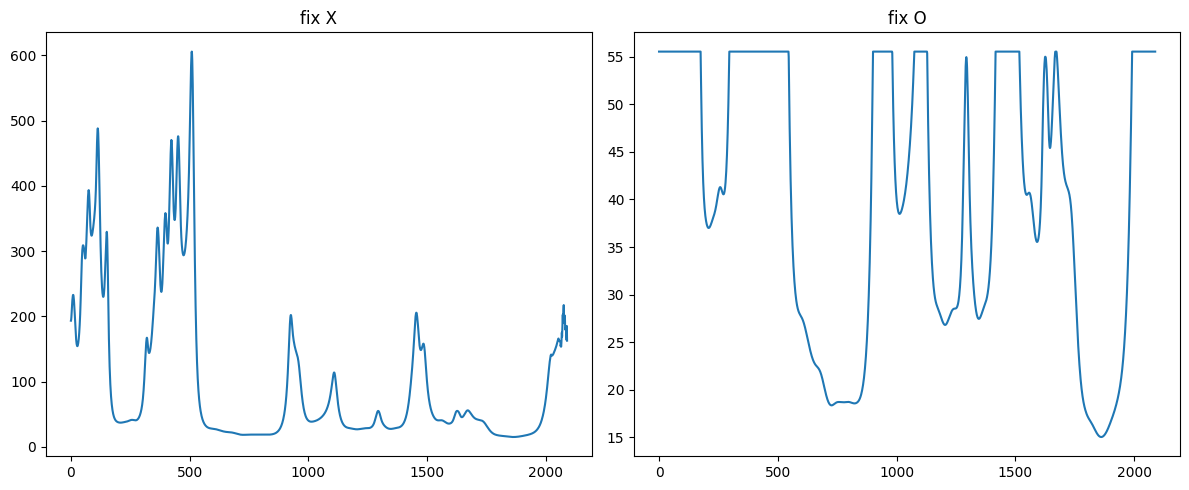

In [187]:
fig,ax =plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(vel_arr);ax[0].set_title("fix X")
ax[1].plot(vel_arr_fixed);ax[1].set_title("fix O")
 
fig.tight_layout()
plt.show()


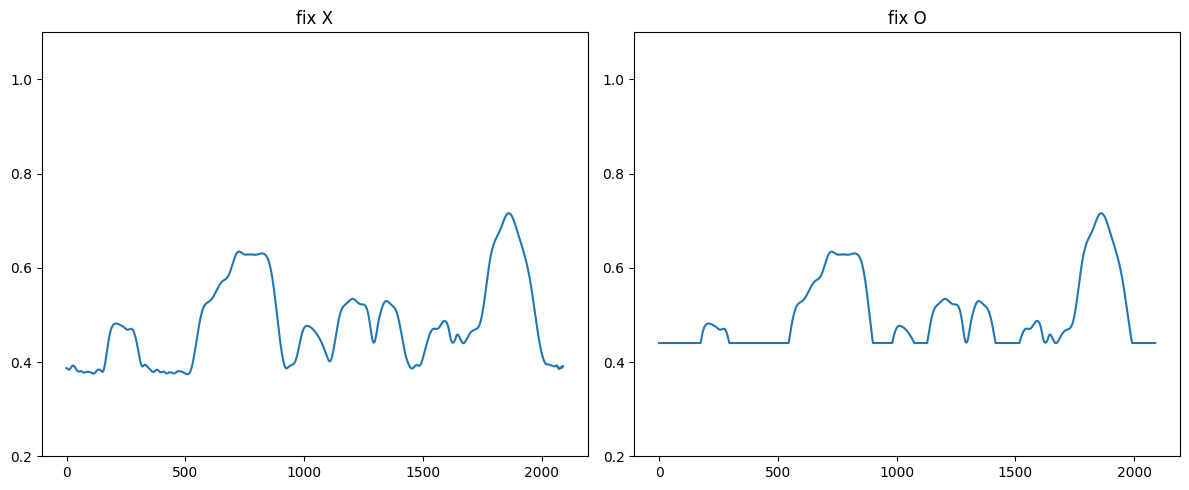

In [195]:
fig,ax =plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(reward_arr);ax[0].set_title("fix X");ax[0].set_ylim(0.2, 1.1)
ax[1].plot(reward_arr_fixed);ax[1].set_title("fix O");ax[1].set_ylim(0.2, 1.1)
# plt.ylim(0.2, 1.1)
fig.tight_layout()
plt.show()


##### `ckpt loading debug`

In [2]:
ckpt_path = r'D:\meow_racer_experiments\nam_c_logs\0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3\test'.replace('\\', '/')
from natsort import natsort
from glob import glob
import os, sys

natsort.natsorted(os.listdir(ckpt_path))

['fail_epoch_0',
 'fail_epoch_10',
 'fail_epoch_20',
 'fail_epoch_30',
 'fail_epoch_60',
 'fail_epoch_90',
 'success_epoch_27',
 'success_epoch_28',
 'success_epoch_32',
 'success_epoch_36',
 'success_epoch_37',
 'success_epoch_38',
 'success_epoch_39',
 'success_epoch_40',
 'success_epoch_41',
 'success_epoch_42',
 'success_epoch_45',
 'success_epoch_47',
 'success_epoch_48',
 'success_epoch_49',
 'success_epoch_50',
 'success_epoch_51',
 'success_epoch_52',
 'success_epoch_54',
 'success_epoch_55',
 'success_epoch_57',
 'success_epoch_62',
 'success_epoch_63',
 'success_epoch_64',
 'success_epoch_65',
 'success_epoch_66',
 'success_epoch_67',
 'success_epoch_68',
 'success_epoch_69',
 'success_epoch_70',
 'success_epoch_71',
 'success_epoch_72',
 'success_epoch_74',
 'success_epoch_76',
 'success_epoch_77',
 'success_epoch_78',
 'success_epoch_80',
 'success_epoch_81',
 'success_epoch_84',
 'success_epoch_85',
 'success_epoch_87',
 'success_epoch_88',
 'success_epoch_89',
 'success_e

In [3]:
import pickle
conf_dict_path = f"{os.path.dirname(ckpt_path)}/conf_dict.pkl"
conf_dict = pickle.load(open(conf_dict_path, 'rb'))

In [4]:
conf_dict

{'simulate': {'window_w': 1000.0,
  'window_h': 1000.0,
  'zoom_rate': 1.5,
  'scale_rate': 1.0,
  'bounds': 1000.0,
  'render_fps': 60.0,
  'bg_color': [0, 0, 0],
  'road_color': [255, 255, 255],
  'car_color': [255, 0, 0],
  'lidar_color': [0, 255, 0],
  'fvec_color': [0, 0, 255],
  'action_cx': 100.0,
  'action_cy': 30.0,
  'action_font_size': 15,
  'reward_text_color': [0, 0, 255],
  'reward_bg_color': [255, 255, 255],
  'reward_cx': 300.0,
  'reward_cy': 30.0,
  'reward_font_size': 10,
  'penalty_text_color': [255, 0, 0],
  'penalty_bg_color': [255, 255, 255],
  'penalty_cx': 600.0,
  'penalty_cy': 30.0,
  'penalty_font_size': 10,
  'render_car_state': ['car_x',
   'car_y',
   'Omega',
   'car_phi',
   'torque_action2value',
   'steer_action2value',
   'Vx',
   'Vy',
   'Theta',
   'heading_diff',
   'E_c',
   'E_phi'],
  'car_state_cx': 900.0,
  'car_state_cy': 30.0,
  'car_state_font': 15},
 'environment': {'random_seed': 77,
  'do_debug_logs': 0,
  'track': {'use_nam_only': Tru

In [7]:
from glob import glob
from natsort import natsort
import os, sympy
folders = natsort.natsorted(glob(os.path.dirname(ckpt_path) + "/test/success_*"))

In [8]:
folders

['D:/meow_racer_experiments/nam_c_logs/0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3/test\\success_epoch_27',
 'D:/meow_racer_experiments/nam_c_logs/0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3/test\\success_epoch_28',
 'D:/meow_racer_experiments/nam_c_logs/0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3/test\\success_epoch_32',
 'D:/meow_racer_experiments/nam_c_logs/0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_KappaV1_Ephi01_KappaWeightVelReward3/test\\success_epoch_36',
 'D:/meow_racer_experiments/nam_c_logs/0603_SingleFeet_DTx50_NAM_Aggressive_Act3_timePen01_minVPen_offCnt_NegVelAPSReward_PrgReward1000_PrgRewardVel1_Ka

In [10]:
a = 'qf1_optim'
a = a.replace('optim', 'optimizer')
print(a)

qf1_optimizer


In [13]:
class A:
    def __init__(self):
        self.a = 1
        self.b = 2
    
a_obj = A()
setattr(a_obj, 'b', 4)
a_obj.__dict__

{'a': 1, 'b': 4}

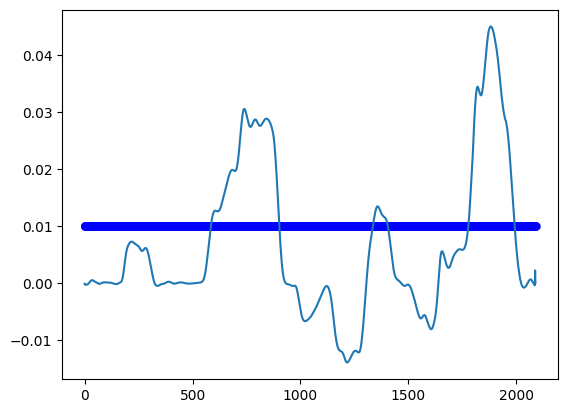

In [25]:
import matplotlib.pyplot as plt
plt.plot(nam_track_dict['kappa'])
max_kappa = max(abs(nam_track_dict['kappa']))
plt.scatter([i for i in range(len(nam_track_dict['kappa']))],
            [0.01 for _ in range(len(nam_track_dict['kappa']))],
            linewidth=0.1, c='b')

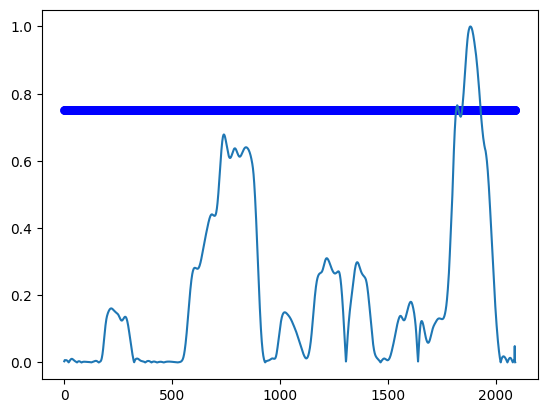

In [30]:
normed_kappa = abs(nam_track_dict['kappa']) / max_kappa
plt.plot(normed_kappa)
plt.scatter([i for i in range(len(nam_track_dict['kappa']))],
            [0.75 for _ in range(len(nam_track_dict['kappa']))],
            linewidth=0.1, c='b')